# benchmarking on omnipath


In [1]:
from scprint import scPrint
from scprint.tasks import GRNfer

from bengrn import BenGRN
import scanpy as sc

from bengrn.base import train_classifier

from anndata.utils import make_index_unique
from bengrn import compute_genie3
from grnndata import utils as grnutils
import numpy as np
import joblib
%load_ext autoreload
%autoreload 2 

import torch
torch.set_float32_matmul_precision('medium')

💡 connected lamindb: jkobject/scprint


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(


In [2]:
model = scPrint.load_from_checkpoint(
#    '../data/temp/o2uniqsx/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
#    '../data/temp/vbd8bavn/epoch=19-step=100000.ckpt', precpt_gene_emb=None)
#    '../data/temp/1tghqqzx_dir/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
    '/pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint_scale/o2uniqsx/checkpoints/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
NUM_GENES = 5000
MAXCELLS = 1024

[d3graph] INFO> Created a temporary directory at /local/scratch/tmp/tmpboh82rw6


[d3graph] INFO> Writing /local/scratch/tmp/tmpboh82rw6/_remote_module_non_scriptable.py


RuntimeError caught: scPrint is not attached to a `Trainer`.


In [3]:
#model.normalization = "sum"

In [4]:
CELLTYPES = [
    'kidney distal convoluted tubule epithelial cell',
    'kidney loop of Henle thick ascending limb epithelial cell',
    'kidney collecting duct principal cell',
    'mesangial cell',
    'blood vessel smooth muscle cell',
    'podocyte',
    'macrophage',
    'leukocyte',
    'kidney interstitial fibroblast',
    'endothelial cell'
]

In [5]:
#adata = sc.read_h5ad('/home/ml4ig1/scprint/.lamindb/yBCKp6HmXuHa0cZptMo7.h5ad')
adata = sc.read_h5ad('../data/yBCKp6HmXuHa0cZptMo7.h5ad')
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
adata

AnnData object with n_obs × n_vars = 15728 × 70116
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'tissue_section_uuid', 'tissue_section_thickness', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'leiden_3', 'leide

In [6]:
#model.normalization = "log"


  0%|          | 0/54 [00:00<?, ?it/s]


  2%|▏         | 1/54 [00:04<03:35,  4.08s/it]


  4%|▎         | 2/54 [00:05<02:17,  2.65s/it]


  6%|▌         | 3/54 [00:07<01:48,  2.13s/it]


  7%|▋         | 4/54 [00:08<01:33,  1.86s/it]


  9%|▉         | 5/54 [00:10<01:25,  1.74s/it]


 11%|█         | 6/54 [00:11<01:19,  1.66s/it]


 13%|█▎        | 7/54 [00:13<01:15,  1.61s/it]


 15%|█▍        | 8/54 [00:14<01:12,  1.57s/it]


 17%|█▋        | 9/54 [00:16<01:08,  1.53s/it]


 19%|█▊        | 10/54 [00:23<02:20,  3.20s/it]


 20%|██        | 11/54 [00:27<02:38,  3.68s/it]


 22%|██▏       | 12/54 [00:29<02:07,  3.03s/it]


 24%|██▍       | 13/54 [00:31<01:51,  2.73s/it]


 26%|██▌       | 14/54 [00:33<01:38,  2.45s/it]


 28%|██▊       | 15/54 [00:37<02:02,  3.14s/it]


 30%|██▉       | 16/54 [00:40<01:48,  2.85s/it]


 31%|███▏      | 17/54 [00:41<01:32,  2.50s/it]


 33%|███▎      | 18/54 [00:44<01:28,  2.46s/it]


 35%|███▌      | 19/54 [00:45<01:17,  2.21s/it]


 37%|███▋      | 20/54 [00:47<01:07,  2.00s/it]


 39%|███▉      | 21/54 [00:49<01:11,  2.17s/it]


 41%|████      | 22/54 [00:51<01:06,  2.07s/it]


 43%|████▎     | 23/54 [00:53<00:58,  1.89s/it]


 44%|████▍     | 24/54 [00:55<01:01,  2.05s/it]


 46%|████▋     | 25/54 [00:57<00:53,  1.85s/it]


 48%|████▊     | 26/54 [00:58<00:49,  1.75s/it]


 50%|█████     | 27/54 [00:59<00:44,  1.65s/it]


 52%|█████▏    | 28/54 [01:01<00:40,  1.56s/it]


 54%|█████▎    | 29/54 [01:04<00:48,  1.95s/it]


 56%|█████▌    | 30/54 [01:08<01:05,  2.71s/it]


 57%|█████▋    | 31/54 [01:10<00:53,  2.33s/it]


 59%|█████▉    | 32/54 [01:11<00:45,  2.08s/it]


 61%|██████    | 33/54 [01:13<00:40,  1.92s/it]


 63%|██████▎   | 34/54 [01:14<00:35,  1.78s/it]


 65%|██████▍   | 35/54 [01:16<00:31,  1.68s/it]


 67%|██████▋   | 36/54 [01:17<00:29,  1.65s/it]


 69%|██████▊   | 37/54 [01:19<00:26,  1.58s/it]


 70%|███████   | 38/54 [01:20<00:24,  1.54s/it]


 72%|███████▏  | 39/54 [01:21<00:22,  1.49s/it]


 74%|███████▍  | 40/54 [01:23<00:20,  1.49s/it]


 76%|███████▌  | 41/54 [01:24<00:19,  1.52s/it]


 78%|███████▊  | 42/54 [01:27<00:21,  1.75s/it]


 80%|███████▉  | 43/54 [01:34<00:38,  3.53s/it]


 81%|████████▏ | 44/54 [01:44<00:52,  5.25s/it]


 83%|████████▎ | 45/54 [01:45<00:36,  4.11s/it]


 85%|████████▌ | 46/54 [01:46<00:26,  3.29s/it]


 87%|████████▋ | 47/54 [01:48<00:19,  2.73s/it]


 89%|████████▉ | 48/54 [01:49<00:14,  2.34s/it]


 91%|█████████ | 49/54 [01:51<00:10,  2.09s/it]


 93%|█████████▎| 50/54 [01:53<00:07,  1.96s/it]


 94%|█████████▍| 51/54 [01:55<00:05,  1.97s/it]


 96%|█████████▋| 52/54 [01:56<00:03,  1.86s/it]


 98%|█████████▊| 53/54 [01:58<00:01,  1.74s/it]


100%|██████████| 54/54 [01:58<00:00,  1.47s/it]


100%|██████████| 54/54 [01:59<00:00,  2.21s/it]

base enrichment


Top central genes: []


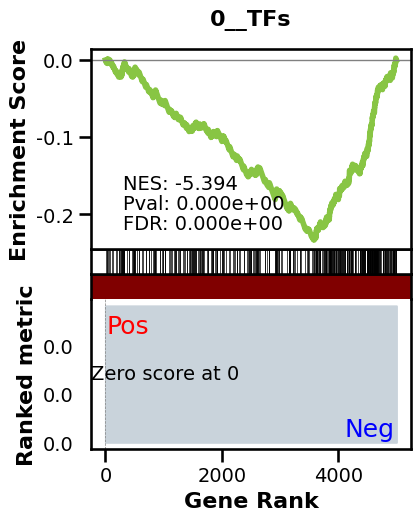

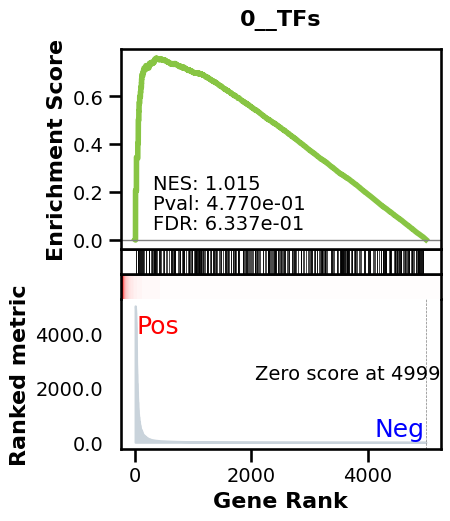

_________________________________________
TF specific enrichment


found some significant results for  14.705882352941176 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3484 genes
intersection pct: 0.6968
precision:  0.0008261483363013599 
recall:  1.0 
random precision: 0.0008263855307705822



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 58.26it/s]


  9%|▉         | 12/128 [00:00<00:01, 58.29it/s]


 14%|█▍        | 18/128 [00:00<00:01, 58.31it/s]


 19%|█▉        | 24/128 [00:00<00:01, 58.27it/s]


 23%|██▎       | 30/128 [00:00<00:01, 58.27it/s]


 28%|██▊       | 36/128 [00:00<00:01, 58.08it/s]


 33%|███▎      | 42/128 [00:00<00:01, 58.12it/s]


 38%|███▊      | 48/128 [00:00<00:01, 58.15it/s]


 42%|████▏     | 54/128 [00:00<00:01, 58.18it/s]


 47%|████▋     | 60/128 [00:01<00:01, 58.20it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 58.20it/s]


 56%|█████▋    | 72/128 [00:01<00:00, 58.11it/s]


 61%|██████    | 78/128 [00:01<00:00, 58.13it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 58.16it/s]


 70%|███████   | 90/128 [00:01<00:00, 58.14it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 58.16it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 58.19it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 58.18it/s]


 89%|████████▉ | 114/128 [00:01<00:00, 58.22it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 57.98it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 58.08it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 58.05it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0008765866577707097


EPR: 2.7836056684301527


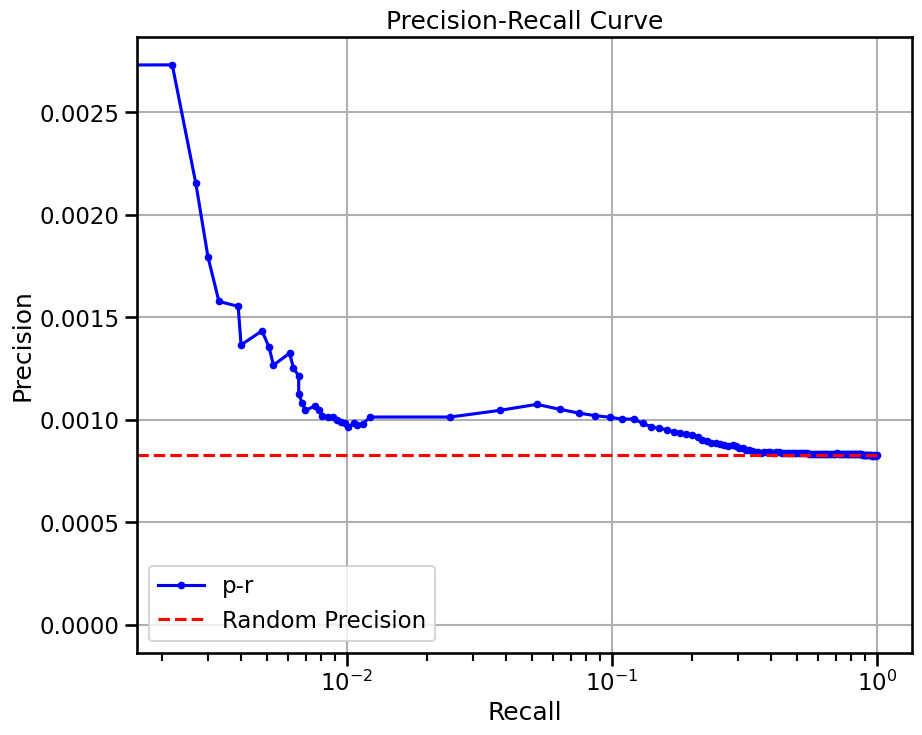

train classifier


true elem 10028 ...


doing classification....


metrics {'used_heads': 3, 'precision': 0.0008314620117426245, 'random_precision': 0.0008314620117426245, 'recall': 1.0, 'predicted_true': 4855303.0, 'number_of_true': 4037.0}


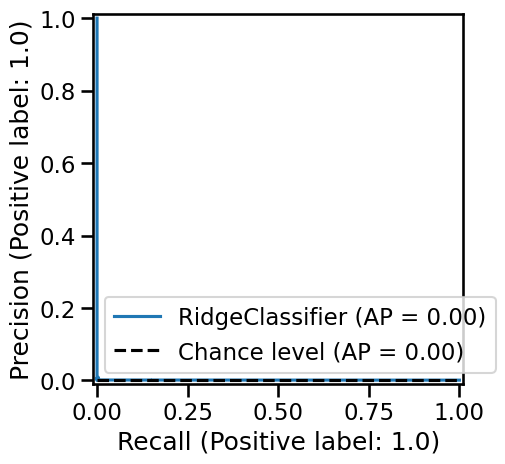

scprint_benchmark2
base enrichment


Top central genes: []


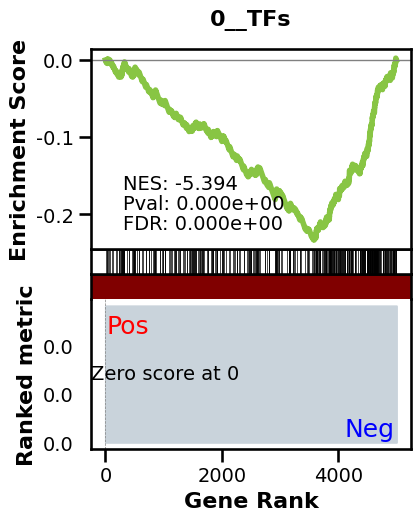

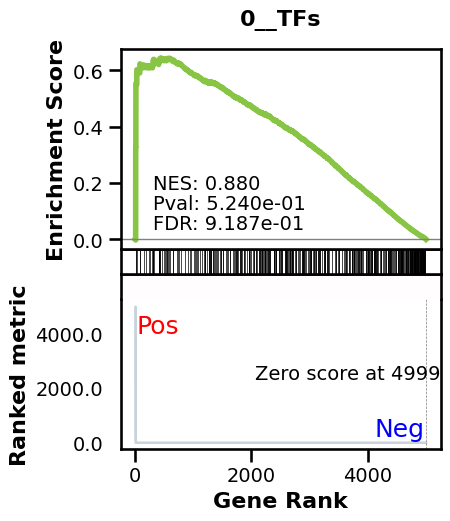

_________________________________________
TF specific enrichment


found some significant results for  2.9411764705882355 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3484 genes
intersection pct: 0.6968
precision:  0.0008261483363013599 
recall:  1.0 
random precision: 0.0008263855307705822



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 58.12it/s]


  9%|▉         | 12/128 [00:00<00:01, 58.01it/s]


 14%|█▍        | 18/128 [00:00<00:01, 58.01it/s]


 19%|█▉        | 24/128 [00:00<00:01, 58.01it/s]


 23%|██▎       | 30/128 [00:00<00:01, 57.98it/s]


 28%|██▊       | 36/128 [00:00<00:01, 57.80it/s]


 33%|███▎      | 42/128 [00:00<00:01, 57.87it/s]


 38%|███▊      | 48/128 [00:00<00:01, 57.93it/s]


 42%|████▏     | 54/128 [00:00<00:01, 57.93it/s]


 47%|████▋     | 60/128 [00:01<00:01, 57.91it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 57.96it/s]


 56%|█████▋    | 72/128 [00:01<00:00, 57.96it/s]


 61%|██████    | 78/128 [00:01<00:00, 57.99it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 57.78it/s]


 70%|███████   | 90/128 [00:01<00:00, 57.84it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 57.87it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 57.92it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 57.96it/s]


 89%|████████▉ | 114/128 [00:01<00:00, 57.97it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 57.99it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 57.95it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 57.90it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0009938231033779985
EPR: 4.979989927628857


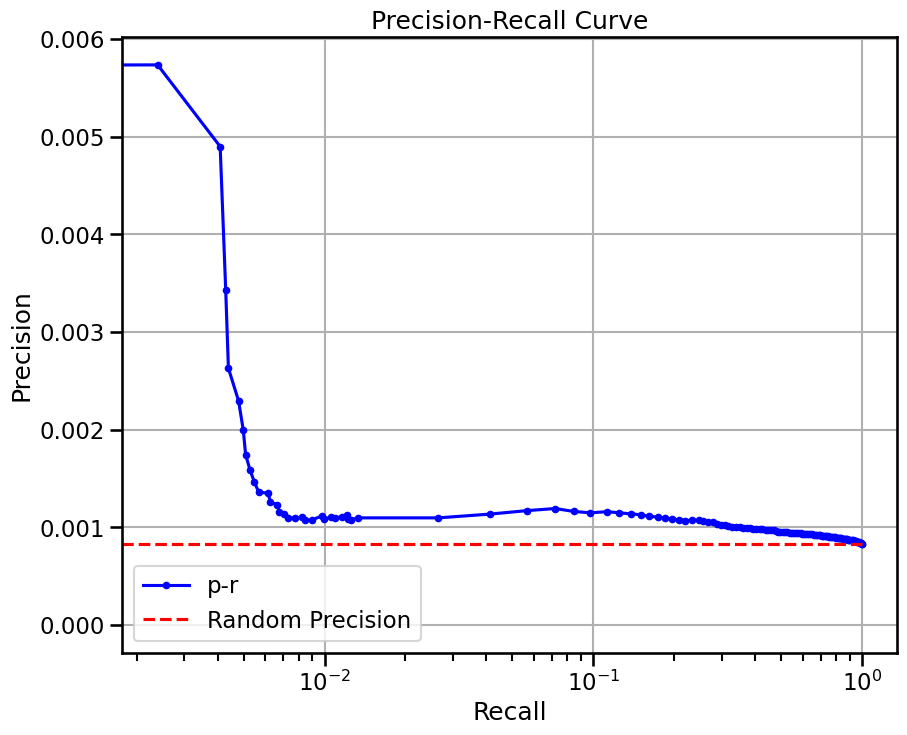


  0%|          | 0/17 [00:00<?, ?it/s]


  6%|▌         | 1/17 [00:02<00:42,  2.66s/it]


 12%|█▏        | 2/17 [00:04<00:29,  1.96s/it]


 18%|█▊        | 3/17 [00:05<00:24,  1.75s/it]


 24%|██▎       | 4/17 [00:07<00:21,  1.63s/it]


 29%|██▉       | 5/17 [00:08<00:18,  1.56s/it]


 35%|███▌      | 6/17 [00:09<00:16,  1.53s/it]


 41%|████      | 7/17 [00:11<00:15,  1.53s/it]


 47%|████▋     | 8/17 [00:12<00:13,  1.51s/it]


 53%|█████▎    | 9/17 [00:14<00:11,  1.49s/it]


 59%|█████▉    | 10/17 [00:15<00:10,  1.48s/it]


 65%|██████▍   | 11/17 [00:17<00:08,  1.47s/it]


 71%|███████   | 12/17 [00:18<00:07,  1.46s/it]


 76%|███████▋  | 13/17 [00:20<00:05,  1.46s/it]


 82%|████████▏ | 14/17 [00:21<00:04,  1.44s/it]


 88%|████████▊ | 15/17 [00:23<00:02,  1.45s/it]


 94%|█████████▍| 16/17 [00:24<00:01,  1.44s/it]


100%|██████████| 17/17 [00:24<00:00,  1.12s/it]


100%|██████████| 17/17 [00:25<00:00,  1.48s/it]

base enrichment


Top central genes: []


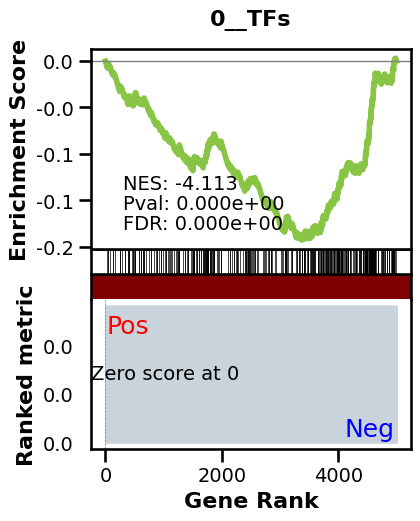

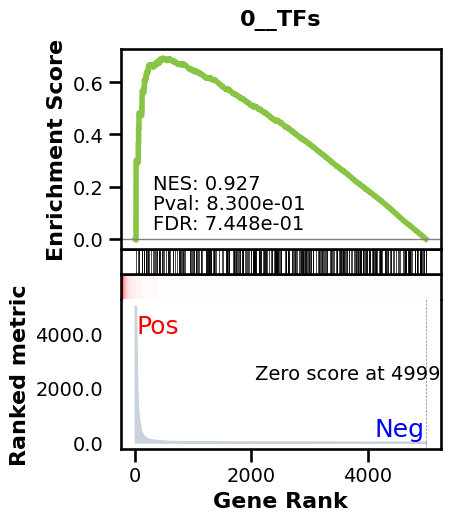

_________________________________________
TF specific enrichment


found some significant results for  7.6923076923076925 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3423 genes
intersection pct: 0.6846
precision:  0.0008334948517653389 
recall:  1.0 
random precision: 0.0008337384212719915



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▌         | 7/128 [00:00<00:01, 61.21it/s]


 11%|█         | 14/128 [00:00<00:01, 61.04it/s]


 16%|█▋        | 21/128 [00:00<00:01, 60.97it/s]


 22%|██▏       | 28/128 [00:00<00:01, 60.94it/s]


 27%|██▋       | 35/128 [00:00<00:01, 60.95it/s]


 33%|███▎      | 42/128 [00:00<00:01, 60.99it/s]


 38%|███▊      | 49/128 [00:00<00:01, 60.96it/s]


 44%|████▍     | 56/128 [00:00<00:01, 60.95it/s]


 49%|████▉     | 63/128 [00:01<00:01, 60.96it/s]


 55%|█████▍    | 70/128 [00:01<00:00, 60.97it/s]


 60%|██████    | 77/128 [00:01<00:00, 60.94it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 60.86it/s]


 71%|███████   | 91/128 [00:01<00:00, 60.84it/s]


 77%|███████▋  | 98/128 [00:01<00:00, 60.78it/s]


 82%|████████▏ | 105/128 [00:01<00:00, 60.85it/s]


 88%|████████▊ | 112/128 [00:01<00:00, 60.86it/s]


 93%|█████████▎| 119/128 [00:01<00:00, 60.90it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



 98%|█████████▊| 126/128 [00:02<00:00, 60.80it/s]


100%|██████████| 128/128 [00:02<00:00, 60.87it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0008891875675074028
EPR: 2.462294801818014


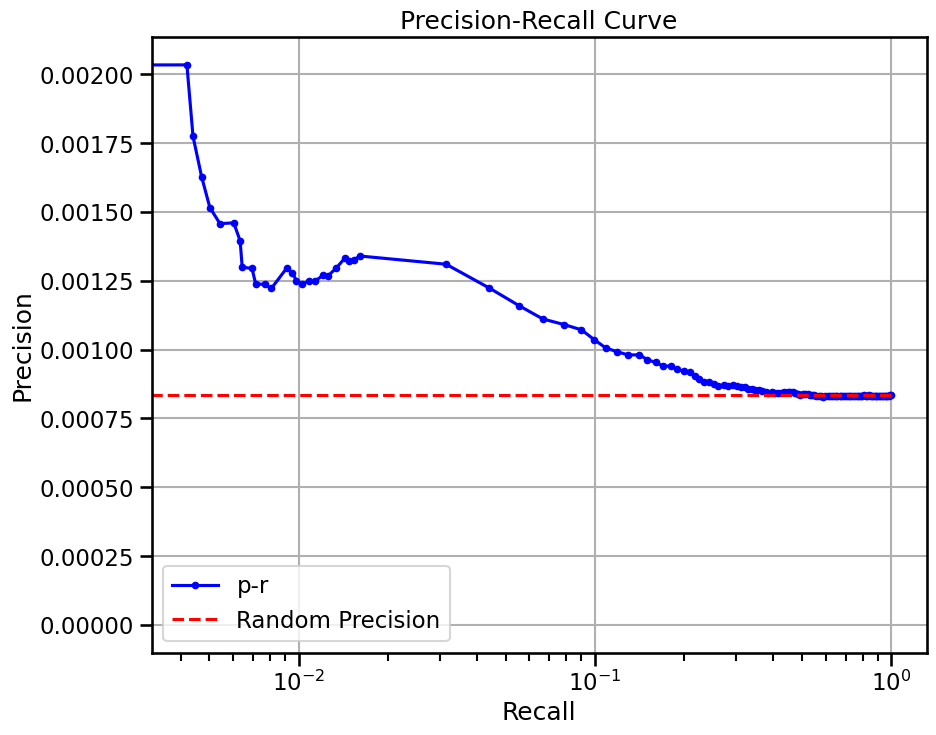

scprint_benchmark2
base enrichment


Top central genes: []


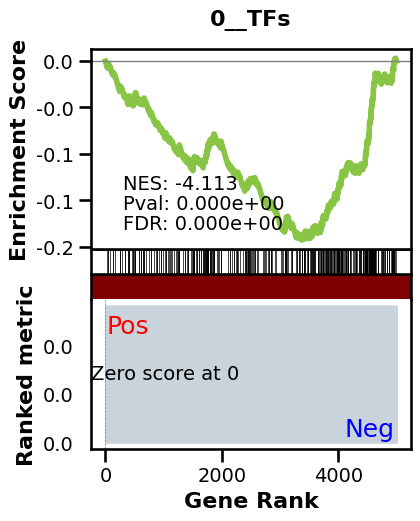

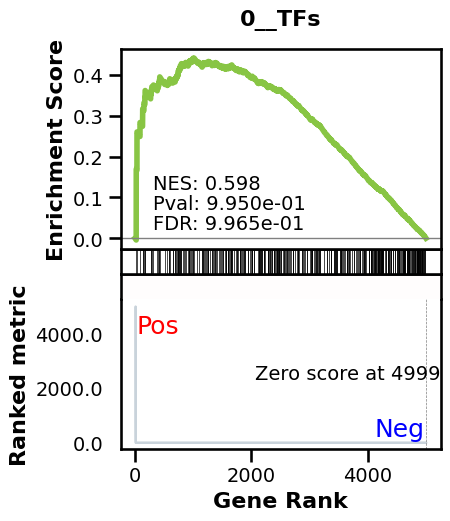

_________________________________________
TF specific enrichment


found some significant results for  7.6923076923076925 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3423 genes
intersection pct: 0.6846
precision:  0.0008334948517653389 
recall:  1.0 
random precision: 0.0008337384212719915



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 59.97it/s]


  9%|▉         | 12/128 [00:00<00:01, 59.73it/s]


 14%|█▍        | 18/128 [00:00<00:01, 59.47it/s]


 19%|█▉        | 24/128 [00:00<00:01, 59.56it/s]


 23%|██▎       | 30/128 [00:00<00:01, 59.63it/s]


 28%|██▊       | 36/128 [00:00<00:01, 59.51it/s]


 33%|███▎      | 42/128 [00:00<00:01, 59.61it/s]


 38%|███▊      | 48/128 [00:00<00:01, 59.67it/s]


 42%|████▏     | 54/128 [00:00<00:01, 59.70it/s]


 47%|████▋     | 60/128 [00:01<00:01, 59.44it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 59.50it/s]


 56%|█████▋    | 72/128 [00:01<00:00, 59.54it/s]


 61%|██████    | 78/128 [00:01<00:00, 59.13it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 59.38it/s]


 70%|███████   | 90/128 [00:01<00:00, 59.22it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 59.37it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 59.52it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 59.63it/s]


 89%|████████▉ | 114/128 [00:01<00:00, 59.58it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 59.55it/s]


 99%|█████████▉| 127/128 [00:02<00:00, 59.85it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 59.52it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0009587904720622541
EPR: 5.319019774843278


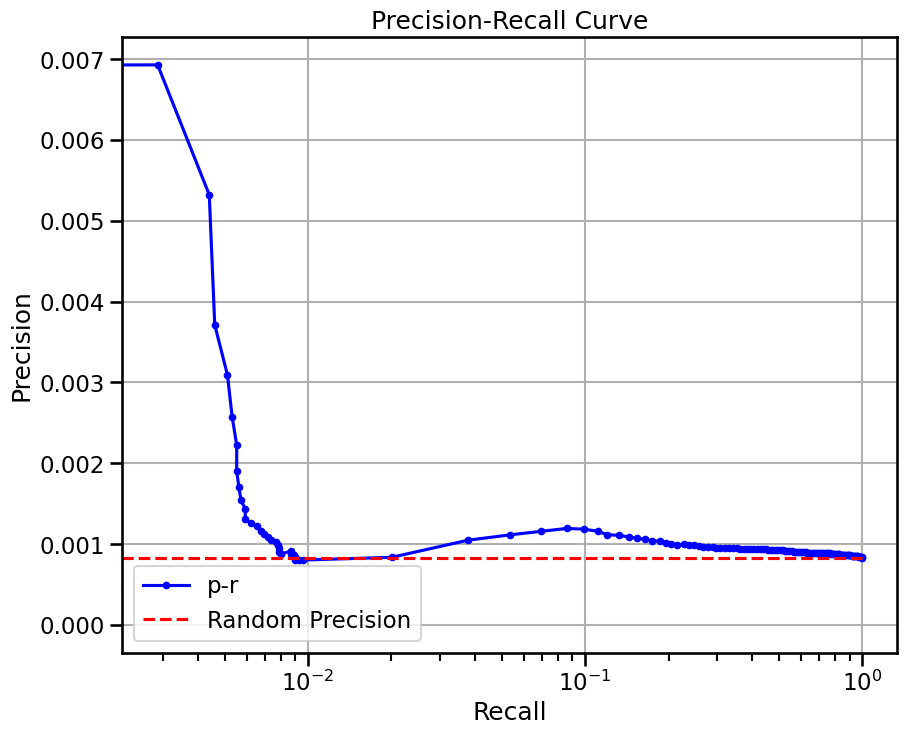


  0%|          | 0/22 [00:00<?, ?it/s]


  5%|▍         | 1/22 [00:02<01:00,  2.87s/it]


  9%|▉         | 2/22 [00:04<00:40,  2.00s/it]


 14%|█▎        | 3/22 [00:05<00:32,  1.71s/it]


 18%|█▊        | 4/22 [00:06<00:28,  1.57s/it]


 23%|██▎       | 5/22 [00:08<00:25,  1.49s/it]


 27%|██▋       | 6/22 [00:09<00:22,  1.44s/it]


 32%|███▏      | 7/22 [00:10<00:21,  1.40s/it]


 36%|███▋      | 8/22 [00:12<00:19,  1.38s/it]


 41%|████      | 9/22 [00:13<00:17,  1.36s/it]


 45%|████▌     | 10/22 [00:14<00:16,  1.35s/it]


 50%|█████     | 11/22 [00:16<00:14,  1.36s/it]


 55%|█████▍    | 12/22 [00:17<00:13,  1.35s/it]


 59%|█████▉    | 13/22 [00:18<00:12,  1.34s/it]


 64%|██████▎   | 14/22 [00:20<00:10,  1.34s/it]


 68%|██████▊   | 15/22 [00:21<00:09,  1.39s/it]


 73%|███████▎  | 16/22 [00:23<00:08,  1.37s/it]


 77%|███████▋  | 17/22 [00:24<00:06,  1.36s/it]


 82%|████████▏ | 18/22 [00:25<00:05,  1.35s/it]


 86%|████████▋ | 19/22 [00:27<00:04,  1.34s/it]


 91%|█████████ | 20/22 [00:28<00:02,  1.33s/it]


 95%|█████████▌| 21/22 [00:29<00:01,  1.33s/it]


100%|██████████| 22/22 [00:30<00:00,  1.22s/it]


100%|██████████| 22/22 [00:30<00:00,  1.41s/it]

base enrichment


Top central genes: []


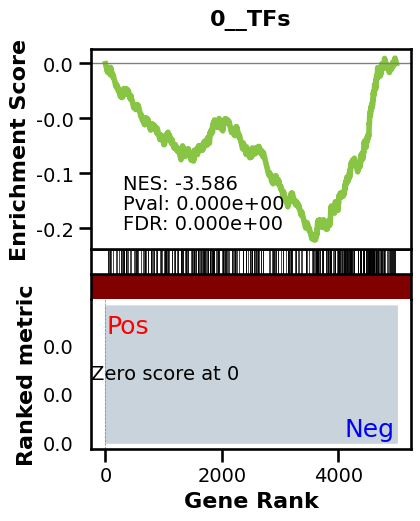

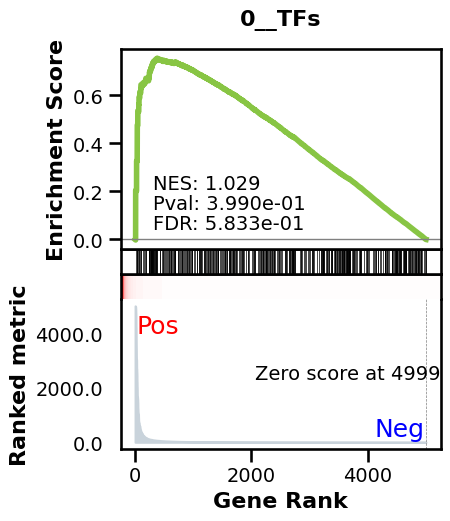

_________________________________________
TF specific enrichment


found some significant results for  12.5 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3518 genes
intersection pct: 0.7036
precision:  0.0012585320164533508 
recall:  1.0 
random precision: 0.001258889858937415



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 54.52it/s]


  9%|▉         | 12/128 [00:00<00:02, 52.63it/s]


 14%|█▍        | 18/128 [00:00<00:02, 53.26it/s]


 19%|█▉        | 24/128 [00:00<00:01, 53.65it/s]


 23%|██▎       | 30/128 [00:00<00:01, 53.87it/s]


 28%|██▊       | 36/128 [00:00<00:01, 54.02it/s]


 33%|███▎      | 42/128 [00:00<00:01, 54.13it/s]


 38%|███▊      | 48/128 [00:00<00:01, 54.16it/s]


 42%|████▏     | 54/128 [00:01<00:01, 54.19it/s]


 47%|████▋     | 60/128 [00:01<00:01, 54.19it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 54.21it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 54.27it/s]


 61%|██████    | 78/128 [00:01<00:00, 54.23it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 54.28it/s]


 70%|███████   | 90/128 [00:01<00:00, 54.23it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 54.18it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 54.23it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 54.13it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 54.19it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 54.19it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



 98%|█████████▊| 126/128 [00:02<00:00, 54.04it/s]


100%|██████████| 128/128 [00:02<00:00, 54.05it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001372362712884411
EPR: 1.0200188491106477


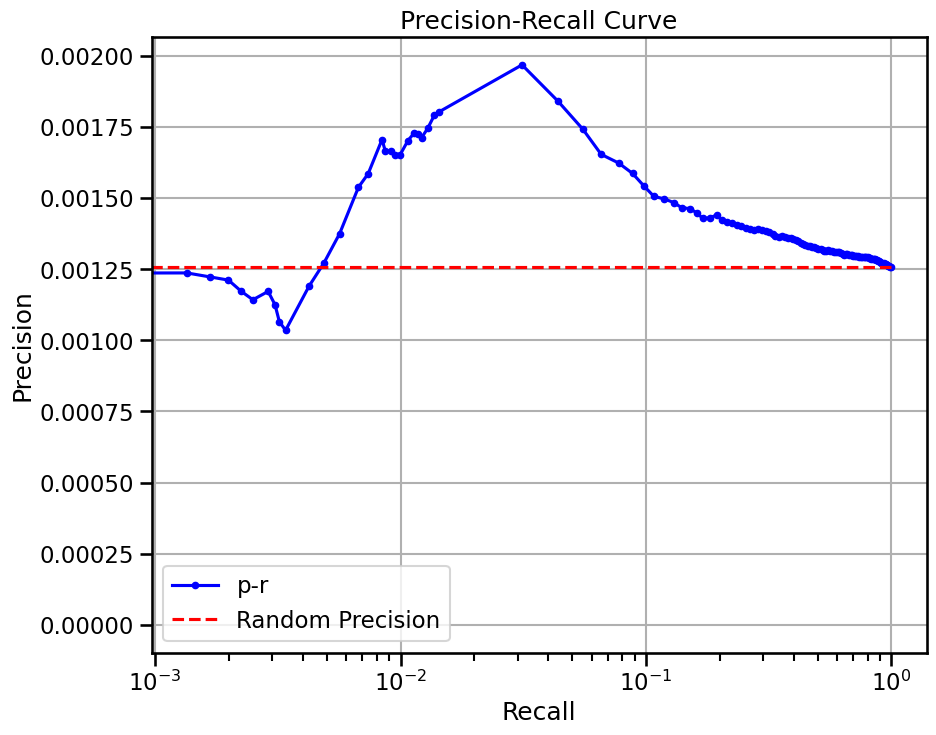

scprint_benchmark2
base enrichment


Top central genes: []


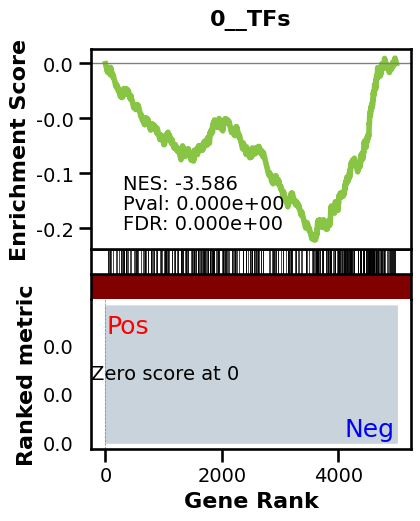

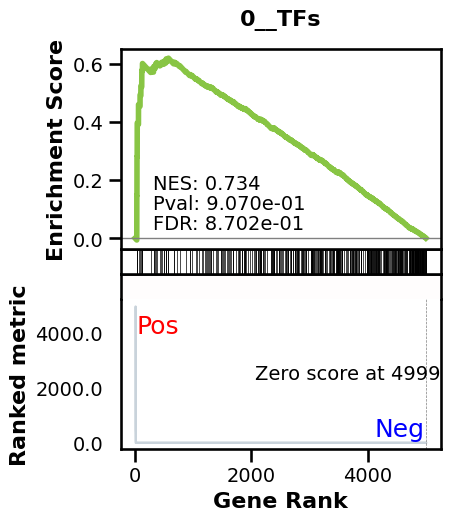

_________________________________________
TF specific enrichment


found some significant results for  4.6875 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3518 genes
intersection pct: 0.7036
precision:  0.0012585320164533508 
recall:  1.0 
random precision: 0.001258889858937415



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 55.03it/s]


  9%|▉         | 12/128 [00:00<00:02, 54.64it/s]


 14%|█▍        | 18/128 [00:00<00:02, 54.82it/s]


 19%|█▉        | 24/128 [00:00<00:01, 54.92it/s]


 23%|██▎       | 30/128 [00:00<00:01, 54.42it/s]


 28%|██▊       | 36/128 [00:00<00:01, 54.61it/s]


 33%|███▎      | 42/128 [00:00<00:01, 54.76it/s]


 38%|███▊      | 48/128 [00:00<00:01, 54.39it/s]


 42%|████▏     | 54/128 [00:00<00:01, 54.60it/s]


 47%|████▋     | 60/128 [00:01<00:01, 54.11it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 52.95it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 53.54it/s]


 61%|██████    | 78/128 [00:01<00:00, 53.97it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 53.83it/s]


 70%|███████   | 90/128 [00:01<00:00, 54.21it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 54.48it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 54.66it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 54.61it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 54.29it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 54.52it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 54.60it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 54.33it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0018870479466706835
EPR: 1.7371594010847209


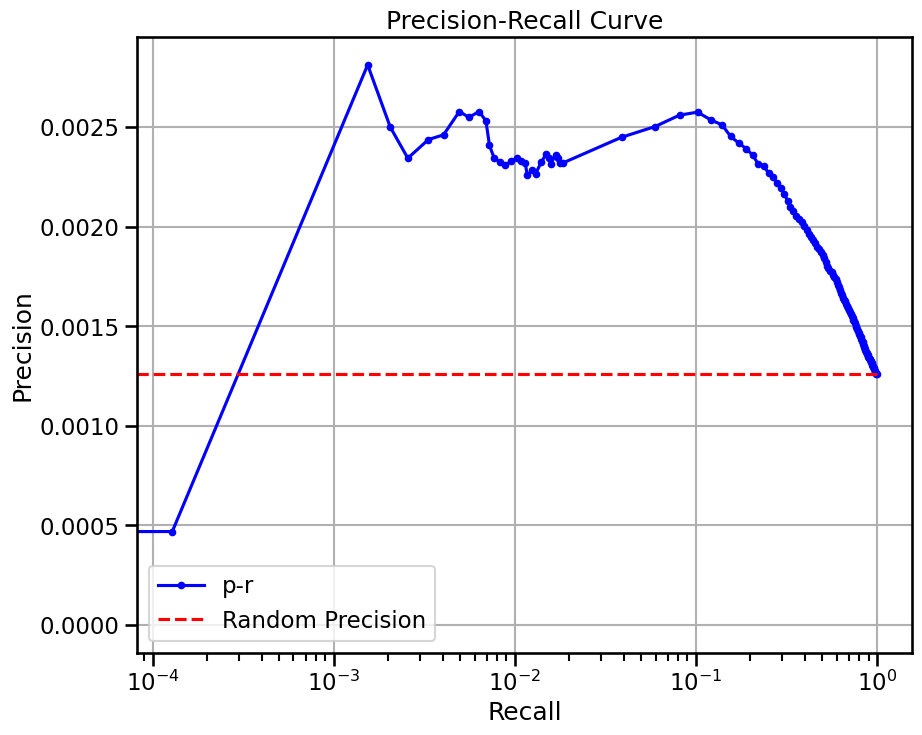


  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:01<00:00,  2.00s/it]


100%|██████████| 1/1 [00:02<00:00,  2.23s/it]

base enrichment


Top central genes: []


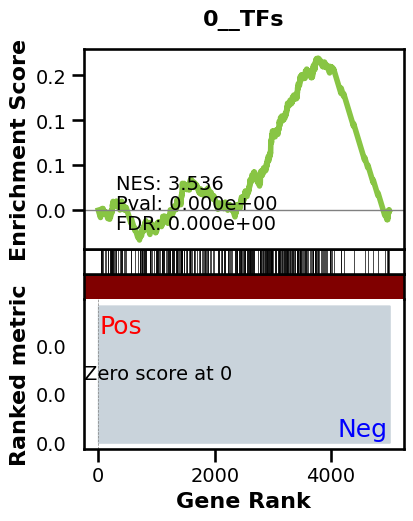

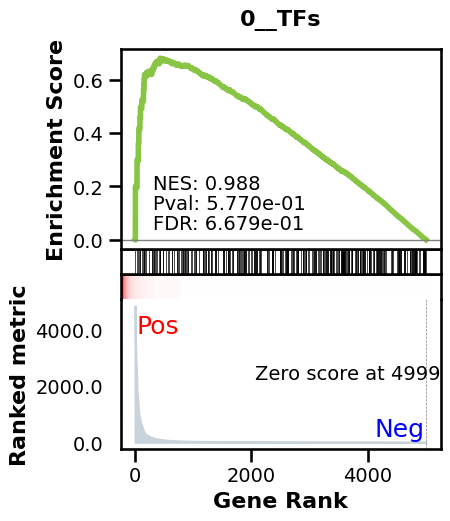

_________________________________________
TF specific enrichment


found some significant results for  25.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2812 genes
intersection pct: 0.5624
precision:  0.0010440926814363964 
recall:  1.0 
random precision: 0.0010444641124863559



  0%|          | 0/128 [00:00<?, ?it/s]


  7%|▋         | 9/128 [00:00<00:01, 89.91it/s]


 14%|█▍        | 18/128 [00:00<00:01, 89.85it/s]


 22%|██▏       | 28/128 [00:00<00:01, 89.84it/s]


 30%|██▉       | 38/128 [00:00<00:00, 90.67it/s]


 38%|███▊      | 48/128 [00:00<00:00, 90.48it/s]


 45%|████▌     | 58/128 [00:00<00:00, 89.94it/s]


 52%|█████▏    | 67/128 [00:00<00:00, 89.94it/s]


 59%|█████▉    | 76/128 [00:00<00:00, 89.47it/s]


 67%|██████▋   | 86/128 [00:00<00:00, 89.68it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 89.82it/s]


 82%|████████▏ | 105/128 [00:01<00:00, 89.72it/s]


 89%|████████▉ | 114/128 [00:01<00:00, 89.77it/s]


 96%|█████████▌| 123/128 [00:01<00:00, 89.82it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 89.70it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0012639724728972113
EPR: 1.043804149291498


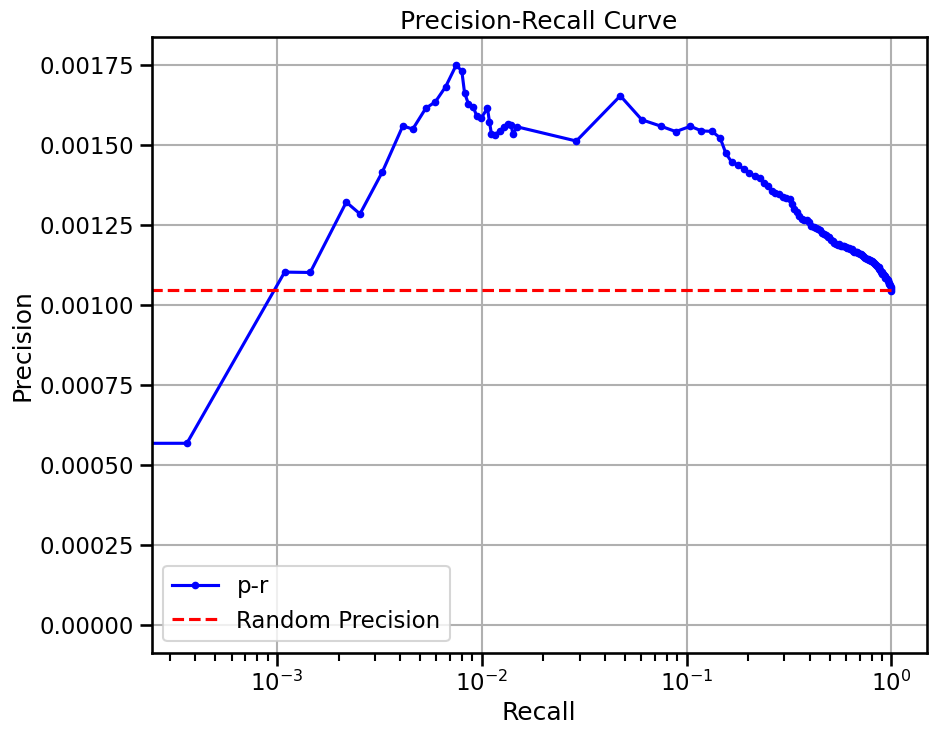

scprint_benchmark2
base enrichment


Top central genes: []


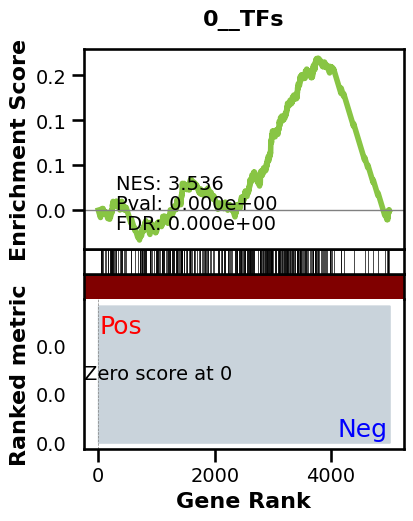

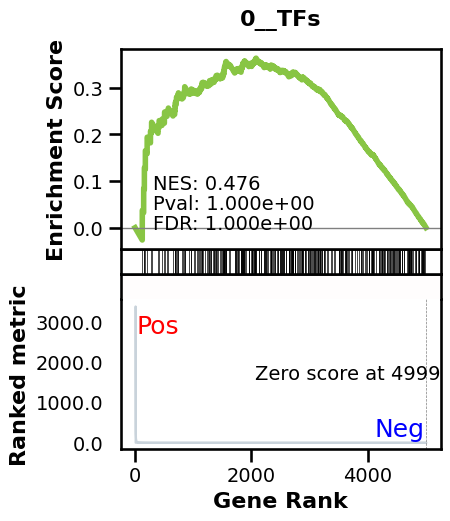

_________________________________________
TF specific enrichment


found some significant results for  25.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2812 genes
intersection pct: 0.5624
precision:  0.0010440926814363964 
recall:  1.0 
random precision: 0.0010444641124863559



  0%|          | 0/128 [00:00<?, ?it/s]


  7%|▋         | 9/128 [00:00<00:01, 89.86it/s]


 14%|█▍        | 18/128 [00:00<00:01, 89.91it/s]


 21%|██        | 27/128 [00:00<00:01, 89.85it/s]


 28%|██▊       | 36/128 [00:00<00:01, 89.42it/s]


 35%|███▌      | 45/128 [00:00<00:00, 89.47it/s]


 42%|████▏     | 54/128 [00:00<00:00, 89.54it/s]


 49%|████▉     | 63/128 [00:00<00:00, 89.58it/s]


 56%|█████▋    | 72/128 [00:00<00:00, 89.24it/s]


 63%|██████▎   | 81/128 [00:00<00:00, 89.37it/s]


 70%|███████   | 90/128 [00:01<00:00, 89.52it/s]


 77%|███████▋  | 99/128 [00:01<00:00, 89.54it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 89.62it/s]


 91%|█████████▏| 117/128 [00:01<00:00, 89.53it/s]


 98%|█████████▊| 126/128 [00:01<00:00, 89.53it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 89.46it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0011433078099995656
EPR: 2.2089430445794345


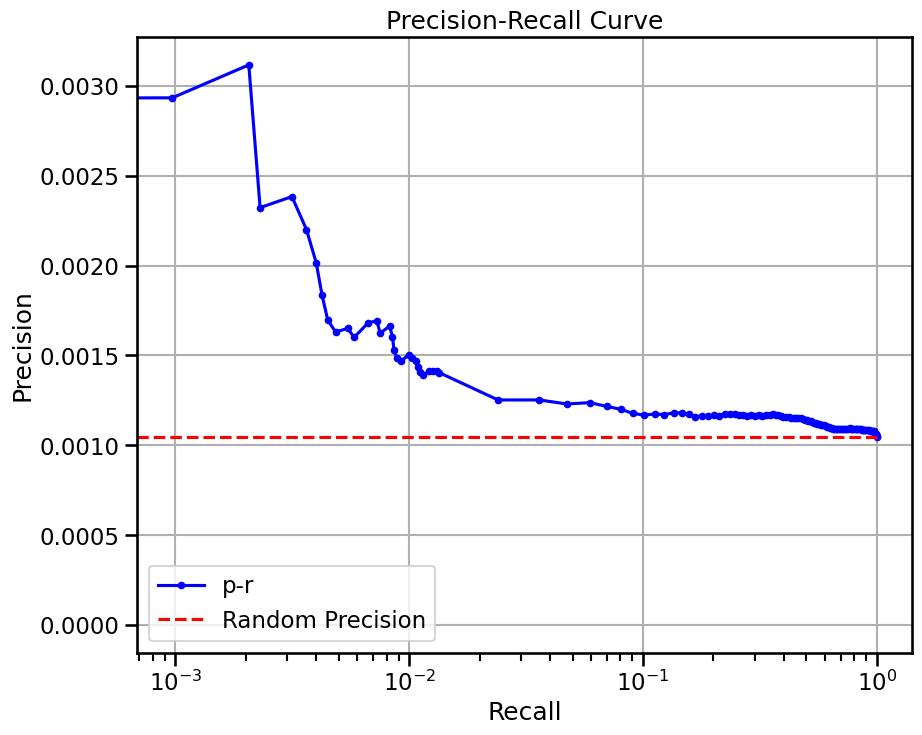


  0%|          | 0/14 [00:00<?, ?it/s]


  7%|▋         | 1/14 [00:02<00:34,  2.66s/it]


 14%|█▍        | 2/14 [00:04<00:23,  1.92s/it]


 21%|██▏       | 3/14 [00:05<00:18,  1.67s/it]


 29%|██▊       | 4/14 [00:06<00:15,  1.56s/it]


 36%|███▌      | 5/14 [00:08<00:13,  1.53s/it]


 43%|████▎     | 6/14 [00:09<00:11,  1.47s/it]


 50%|█████     | 7/14 [00:11<00:10,  1.43s/it]


 57%|█████▋    | 8/14 [00:12<00:08,  1.39s/it]


 64%|██████▍   | 9/14 [00:13<00:06,  1.37s/it]


 71%|███████▏  | 10/14 [00:14<00:05,  1.35s/it]


 79%|███████▊  | 11/14 [00:16<00:04,  1.34s/it]


 86%|████████▌ | 12/14 [00:17<00:02,  1.33s/it]


 93%|█████████▎| 13/14 [00:18<00:01,  1.33s/it]


100%|██████████| 14/14 [00:19<00:00,  1.20s/it]


100%|██████████| 14/14 [00:20<00:00,  1.43s/it]

base enrichment


Top central genes: []


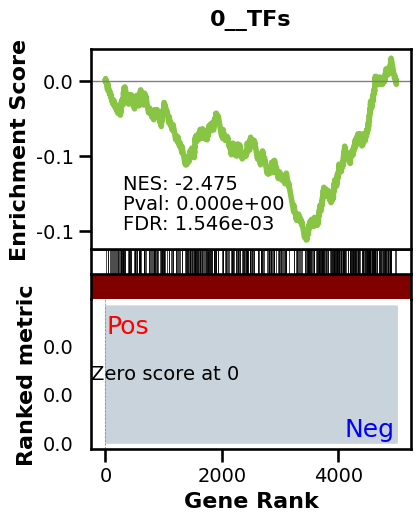

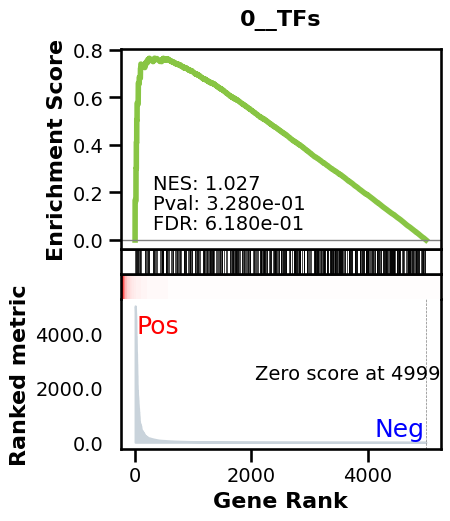

_________________________________________
TF specific enrichment


found some significant results for  10.909090909090908 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3538 genes
intersection pct: 0.7076
precision:  0.0015724456206874184 
recall:  1.0 
random precision: 0.0015728901911201826



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 52.69it/s]


  9%|▉         | 12/128 [00:00<00:02, 52.57it/s]


 14%|█▍        | 18/128 [00:00<00:02, 52.60it/s]


 19%|█▉        | 24/128 [00:00<00:01, 52.40it/s]


 23%|██▎       | 30/128 [00:00<00:01, 52.49it/s]


 28%|██▊       | 36/128 [00:00<00:01, 52.48it/s]


 33%|███▎      | 42/128 [00:00<00:01, 52.50it/s]


 38%|███▊      | 48/128 [00:00<00:01, 52.51it/s]


 42%|████▏     | 54/128 [00:01<00:01, 52.52it/s]


 47%|████▋     | 60/128 [00:01<00:01, 52.56it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 52.61it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 52.62it/s]


 61%|██████    | 78/128 [00:01<00:00, 52.58it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 52.54it/s]


 70%|███████   | 90/128 [00:01<00:00, 52.56it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 52.59it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 52.60it/s]


 84%|████████▍ | 108/128 [00:02<00:00, 52.59it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 52.63it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 52.66it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



 98%|█████████▊| 126/128 [00:02<00:00, 52.56it/s]


100%|██████████| 128/128 [00:02<00:00, 52.47it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0016944584939747346
EPR: 1.4556069113091783


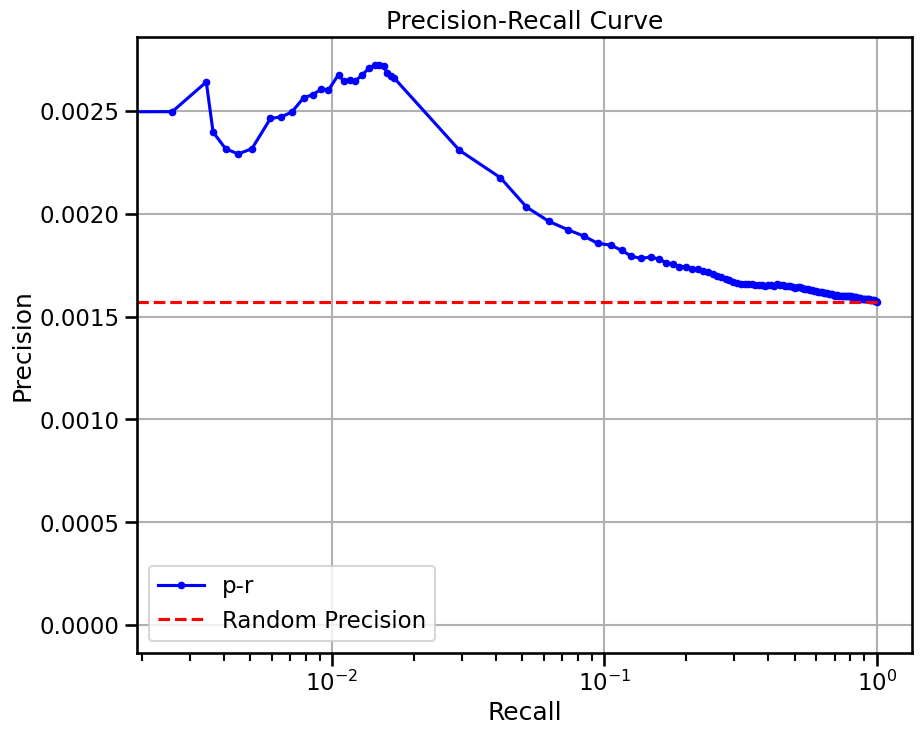

scprint_benchmark2
base enrichment


Top central genes: []


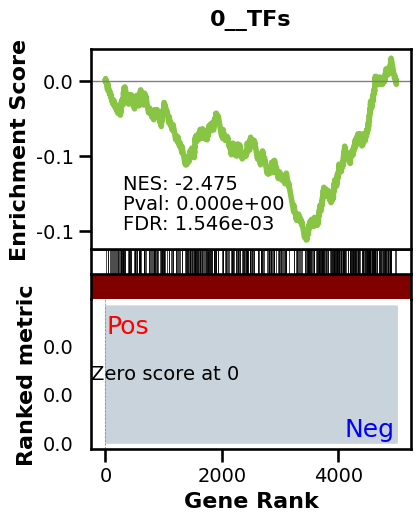

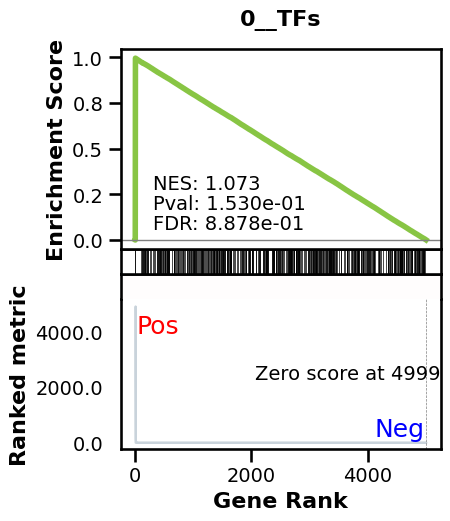

_________________________________________
TF specific enrichment


found some significant results for  10.909090909090908 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3538 genes
intersection pct: 0.7076
precision:  0.0015724456206874184 
recall:  1.0 
random precision: 0.0015728901911201826



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 53.57it/s]


  9%|▉         | 12/128 [00:00<00:02, 53.48it/s]


 14%|█▍        | 18/128 [00:00<00:02, 53.22it/s]


 19%|█▉        | 24/128 [00:00<00:01, 53.17it/s]


 23%|██▎       | 30/128 [00:00<00:01, 53.13it/s]


 28%|██▊       | 36/128 [00:00<00:01, 52.97it/s]


 33%|███▎      | 42/128 [00:00<00:01, 53.08it/s]


 38%|███▊      | 48/128 [00:00<00:01, 53.10it/s]


 42%|████▏     | 54/128 [00:01<00:01, 52.98it/s]


 47%|████▋     | 60/128 [00:01<00:01, 53.04it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 53.16it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 53.19it/s]


 61%|██████    | 78/128 [00:01<00:00, 53.25it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 53.34it/s]


 70%|███████   | 90/128 [00:01<00:00, 53.27it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 53.28it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 53.37it/s]


 84%|████████▍ | 108/128 [00:02<00:00, 53.38it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 53.43it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 53.46it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 53.31it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 53.21it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0020310253452370383
EPR: 2.0089823089392


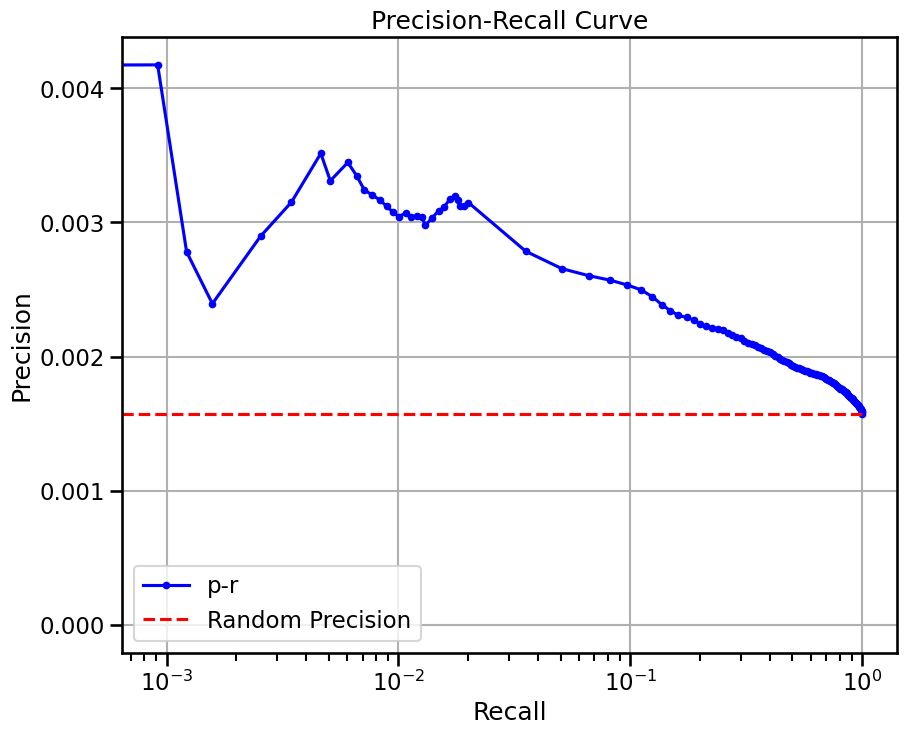


  0%|          | 0/22 [00:00<?, ?it/s]


  5%|▍         | 1/22 [00:02<00:58,  2.78s/it]


  9%|▉         | 2/22 [00:04<00:39,  1.96s/it]


 14%|█▎        | 3/22 [00:05<00:32,  1.70s/it]


 18%|█▊        | 4/22 [00:06<00:28,  1.58s/it]


 23%|██▎       | 5/22 [00:08<00:25,  1.51s/it]


 27%|██▋       | 6/22 [00:09<00:23,  1.47s/it]


 32%|███▏      | 7/22 [00:11<00:21,  1.44s/it]


 36%|███▋      | 8/22 [00:12<00:19,  1.42s/it]


 41%|████      | 9/22 [00:13<00:18,  1.41s/it]


 45%|████▌     | 10/22 [00:15<00:17,  1.42s/it]


 50%|█████     | 11/22 [00:16<00:15,  1.41s/it]


 55%|█████▍    | 12/22 [00:18<00:14,  1.41s/it]


 59%|█████▉    | 13/22 [00:19<00:12,  1.39s/it]


 64%|██████▎   | 14/22 [00:20<00:10,  1.37s/it]


 68%|██████▊   | 15/22 [00:22<00:09,  1.36s/it]


 73%|███████▎  | 16/22 [00:23<00:08,  1.35s/it]


 77%|███████▋  | 17/22 [00:24<00:06,  1.35s/it]


 82%|████████▏ | 18/22 [00:26<00:05,  1.35s/it]


 86%|████████▋ | 19/22 [00:27<00:04,  1.34s/it]


 91%|█████████ | 20/22 [00:29<00:03,  1.58s/it]


 95%|█████████▌| 21/22 [00:31<00:01,  1.56s/it]


100%|██████████| 22/22 [00:32<00:00,  1.46s/it]


100%|██████████| 22/22 [00:32<00:00,  1.48s/it]

base enrichment


Top central genes: []


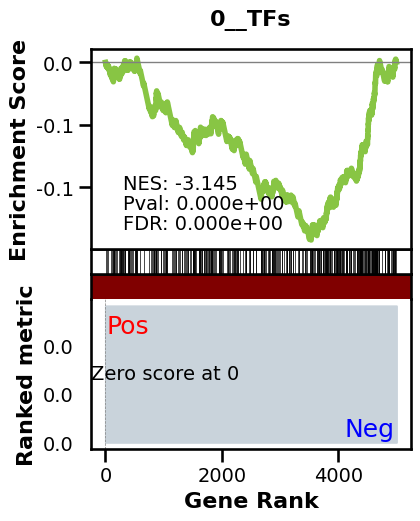

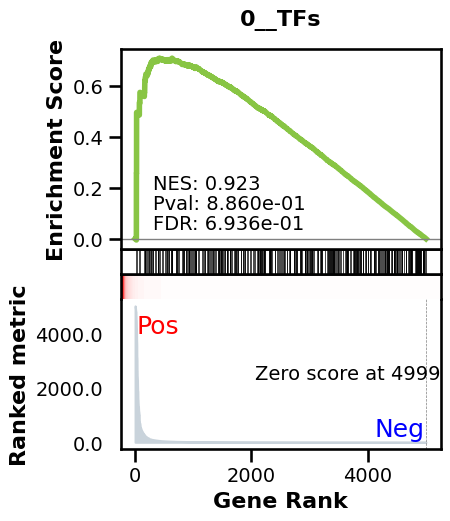

_________________________________________
TF specific enrichment


found some significant results for  8.333333333333334 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3511 genes
intersection pct: 0.7022
precision:  0.0014142799441978382 
recall:  1.0 
random precision: 0.001414682872956869



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 55.04it/s]


  9%|▉         | 12/128 [00:00<00:02, 54.86it/s]


 14%|█▍        | 18/128 [00:00<00:02, 54.96it/s]


 19%|█▉        | 24/128 [00:00<00:01, 55.31it/s]


 23%|██▎       | 30/128 [00:00<00:01, 55.08it/s]


 28%|██▊       | 36/128 [00:00<00:01, 55.07it/s]


 33%|███▎      | 42/128 [00:00<00:01, 54.98it/s]


 38%|███▊      | 48/128 [00:00<00:01, 54.96it/s]


 42%|████▏     | 54/128 [00:00<00:01, 54.81it/s]


 47%|████▋     | 60/128 [00:01<00:01, 54.85it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 54.91it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 54.95it/s]


 61%|██████    | 78/128 [00:01<00:00, 54.89it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 54.72it/s]


 70%|███████   | 90/128 [00:01<00:00, 54.76it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 55.02it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 54.95it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 54.31it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 54.44it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 54.60it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



 98%|█████████▊| 126/128 [00:02<00:00, 54.48it/s]


100%|██████████| 128/128 [00:02<00:00, 54.77it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0015102308611134709
EPR: 1.3392884344800886


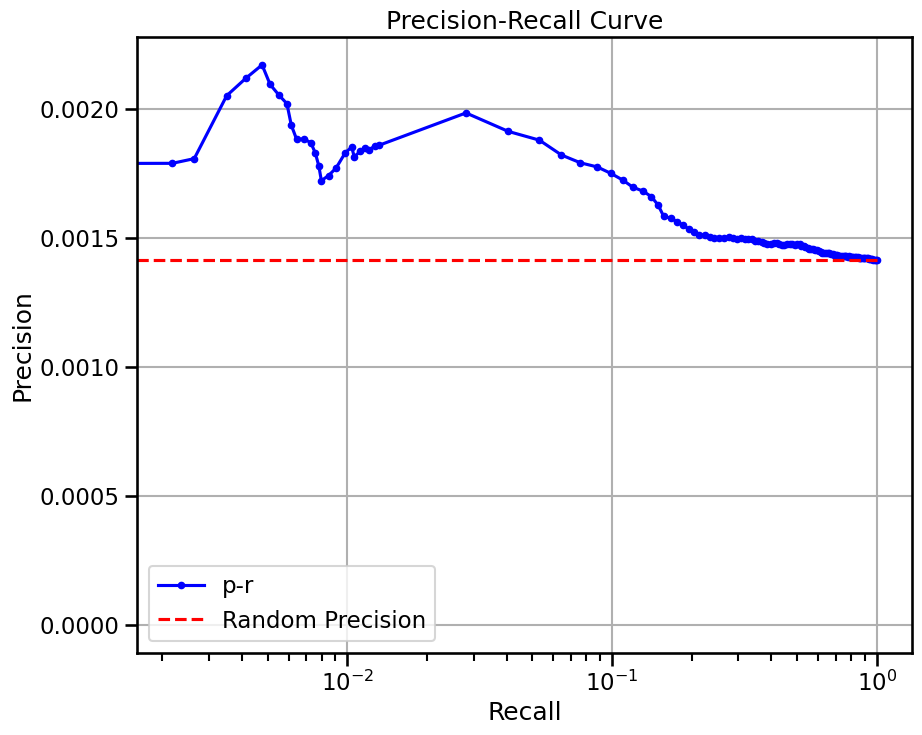

scprint_benchmark2
base enrichment


Top central genes: []


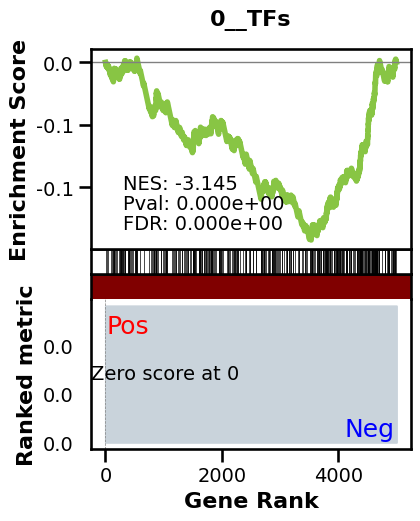

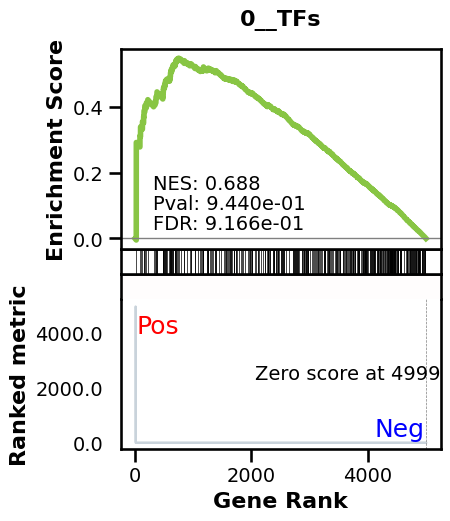

_________________________________________
TF specific enrichment


found some significant results for  8.333333333333334 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3511 genes
intersection pct: 0.7022
precision:  0.0014142799441978382 
recall:  1.0 
random precision: 0.001414682872956869



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 54.82it/s]


  9%|▉         | 12/128 [00:00<00:02, 55.53it/s]


 14%|█▍        | 18/128 [00:00<00:02, 55.00it/s]


 19%|█▉        | 24/128 [00:00<00:01, 54.81it/s]


 23%|██▎       | 30/128 [00:00<00:01, 54.46it/s]


 28%|██▊       | 36/128 [00:00<00:01, 54.06it/s]


 33%|███▎      | 42/128 [00:00<00:01, 54.29it/s]


 38%|███▊      | 48/128 [00:00<00:01, 54.34it/s]


 42%|████▏     | 54/128 [00:00<00:01, 54.38it/s]


 47%|████▋     | 60/128 [00:01<00:01, 53.95it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 54.05it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 54.13it/s]


 61%|██████    | 78/128 [00:01<00:00, 54.15it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 54.19it/s]


 70%|███████   | 90/128 [00:01<00:00, 54.00it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 54.07it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 54.11it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 54.17it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 54.23it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 53.71it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 53.90it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 54.16it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0018673427019831902
EPR: 1.7471423519160048


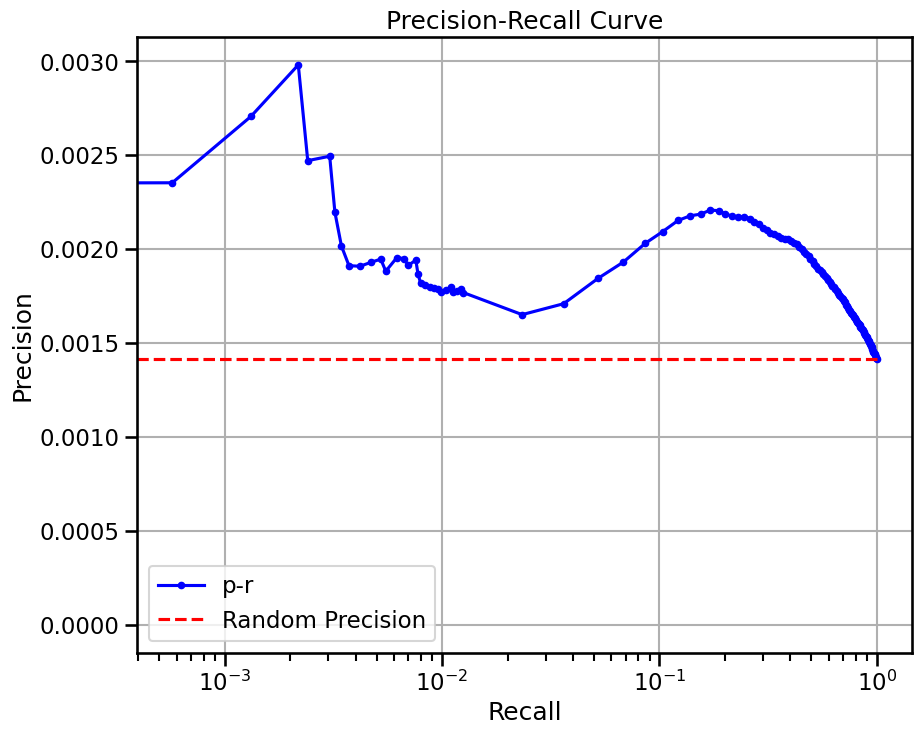


  0%|          | 0/3 [00:00<?, ?it/s]


 33%|███▎      | 1/3 [00:02<00:05,  2.79s/it]


 67%|██████▋   | 2/3 [00:04<00:01,  1.97s/it]


100%|██████████| 3/3 [00:05<00:00,  1.63s/it]


100%|██████████| 3/3 [00:05<00:00,  1.88s/it]

base enrichment


Top central genes: []


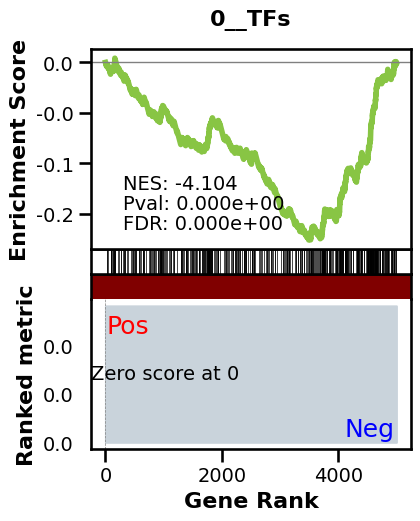

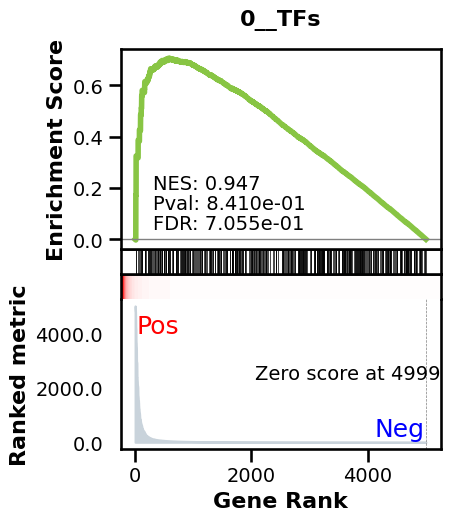

_________________________________________
TF specific enrichment


found some significant results for  16.666666666666668 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3536 genes
intersection pct: 0.7072
precision:  0.0013506038727708277 
recall:  1.0 
random precision: 0.0013509859389300276



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 50.83it/s]


  9%|▉         | 12/128 [00:00<00:02, 52.09it/s]


 14%|█▍        | 18/128 [00:00<00:02, 52.64it/s]


 19%|█▉        | 24/128 [00:00<00:01, 52.70it/s]


 23%|██▎       | 30/128 [00:00<00:01, 52.76it/s]


 28%|██▊       | 36/128 [00:00<00:01, 52.44it/s]


 33%|███▎      | 42/128 [00:00<00:01, 52.68it/s]


 38%|███▊      | 48/128 [00:00<00:01, 52.88it/s]


 42%|████▏     | 54/128 [00:01<00:01, 52.97it/s]


 47%|████▋     | 60/128 [00:01<00:01, 53.07it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 53.12it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 53.12it/s]


 61%|██████    | 78/128 [00:01<00:00, 53.18it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 53.13it/s]


 70%|███████   | 90/128 [00:01<00:00, 53.14it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 53.11it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 53.10it/s]


 84%|████████▍ | 108/128 [00:02<00:00, 53.13it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 53.14it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 53.04it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 53.11it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 52.91it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0014721103736369191


EPR: 0.8763581651319855


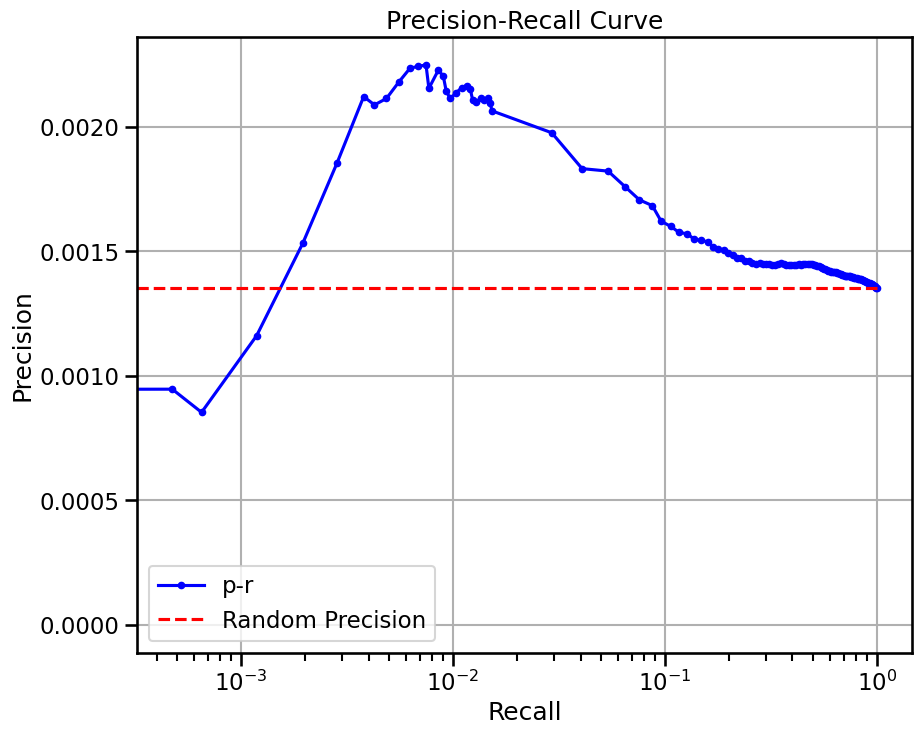

scprint_benchmark2
base enrichment


Top central genes: []


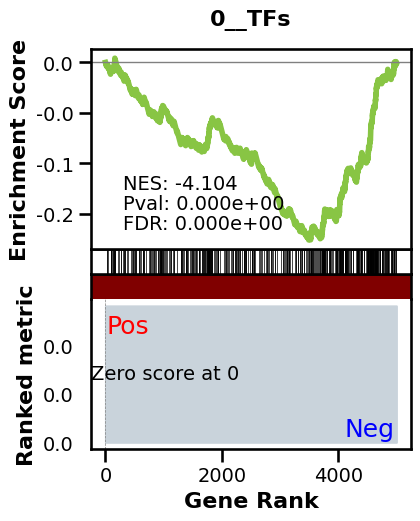

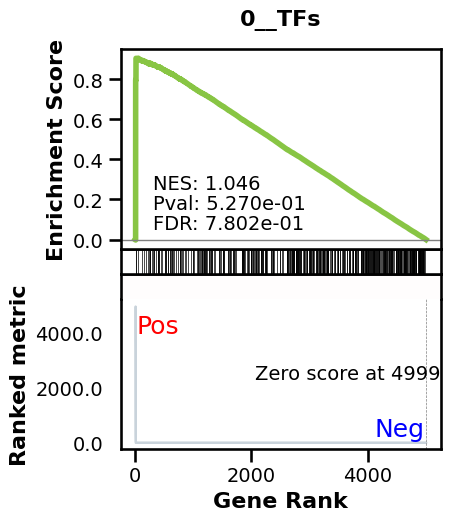

_________________________________________
TF specific enrichment


found some significant results for  11.904761904761905 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3536 genes
intersection pct: 0.7072
precision:  0.0013506038727708277 
recall:  1.0 
random precision: 0.0013509859389300276



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 54.13it/s]


  9%|▉         | 12/128 [00:00<00:02, 54.04it/s]


 14%|█▍        | 18/128 [00:00<00:02, 54.02it/s]


 19%|█▉        | 24/128 [00:00<00:01, 53.99it/s]


 23%|██▎       | 30/128 [00:00<00:01, 54.01it/s]


 28%|██▊       | 36/128 [00:00<00:01, 53.95it/s]


 33%|███▎      | 42/128 [00:00<00:01, 53.95it/s]


 38%|███▊      | 48/128 [00:00<00:01, 53.97it/s]


 42%|████▏     | 54/128 [00:01<00:01, 53.96it/s]


 47%|████▋     | 60/128 [00:01<00:01, 53.96it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 53.96it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 53.93it/s]


 61%|██████    | 78/128 [00:01<00:00, 53.96it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 53.98it/s]


 70%|███████   | 90/128 [00:01<00:00, 53.93it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 53.96it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 53.96it/s]


 84%|████████▍ | 108/128 [00:02<00:00, 53.97it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 53.92it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 53.93it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 53.95it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 53.92it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0020076068458317648
EPR: 2.5529365914315325


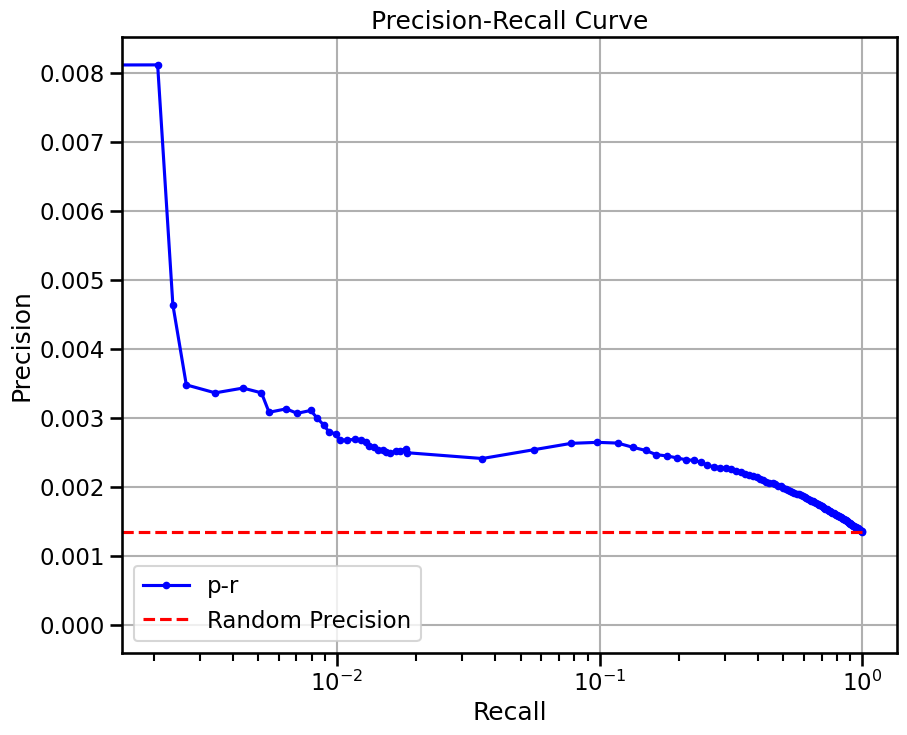


  0%|          | 0/16 [00:00<?, ?it/s]


  6%|▋         | 1/16 [00:02<00:41,  2.75s/it]


 12%|█▎        | 2/16 [00:04<00:27,  1.93s/it]


 19%|█▉        | 3/16 [00:05<00:21,  1.67s/it]


 25%|██▌       | 4/16 [00:06<00:18,  1.56s/it]


 31%|███▏      | 5/16 [00:08<00:16,  1.49s/it]


 38%|███▊      | 6/16 [00:09<00:14,  1.44s/it]


 44%|████▍     | 7/16 [00:10<00:12,  1.41s/it]


 50%|█████     | 8/16 [00:12<00:11,  1.39s/it]


 56%|█████▋    | 9/16 [00:13<00:09,  1.36s/it]


 62%|██████▎   | 10/16 [00:14<00:08,  1.35s/it]


 69%|██████▉   | 11/16 [00:16<00:06,  1.34s/it]


 75%|███████▌  | 12/16 [00:17<00:05,  1.33s/it]


 81%|████████▏ | 13/16 [00:18<00:03,  1.32s/it]


 88%|████████▊ | 14/16 [00:20<00:02,  1.32s/it]


 94%|█████████▍| 15/16 [00:21<00:01,  1.32s/it]


100%|██████████| 16/16 [00:22<00:00,  1.24s/it]


100%|██████████| 16/16 [00:22<00:00,  1.42s/it]

base enrichment


Top central genes: []


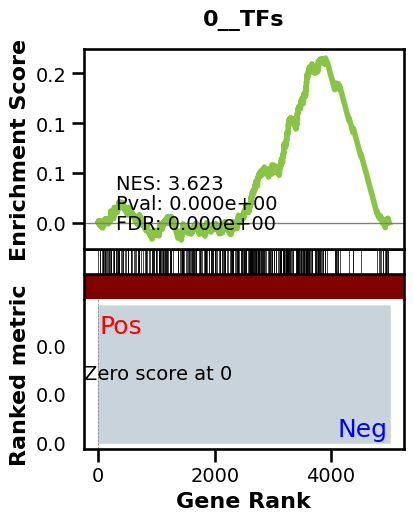

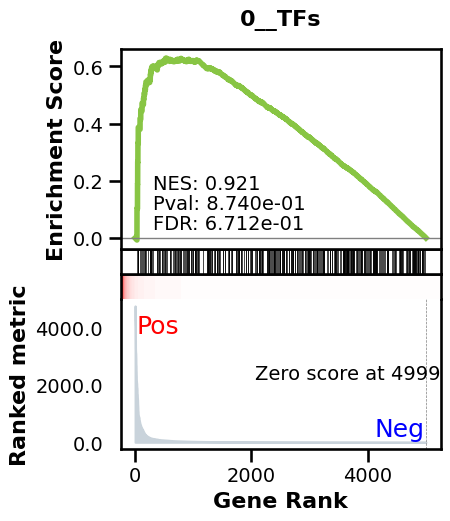

_________________________________________
TF specific enrichment


found some significant results for  41.666666666666664 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2763 genes
intersection pct: 0.5526
precision:  0.0013802419097612326 
recall:  1.0 
random precision: 0.0013807416352897488



  0%|          | 0/128 [00:00<?, ?it/s]


  8%|▊         | 10/128 [00:00<00:01, 91.34it/s]


 16%|█▌        | 20/128 [00:00<00:01, 91.46it/s]


 23%|██▎       | 30/128 [00:00<00:01, 91.60it/s]


 31%|███▏      | 40/128 [00:00<00:00, 91.57it/s]


 39%|███▉      | 50/128 [00:00<00:00, 91.57it/s]


 47%|████▋     | 60/128 [00:00<00:00, 91.67it/s]


 55%|█████▍    | 70/128 [00:00<00:00, 91.68it/s]


 62%|██████▎   | 80/128 [00:00<00:00, 91.73it/s]


 70%|███████   | 90/128 [00:00<00:00, 91.75it/s]


 78%|███████▊  | 100/128 [00:01<00:00, 91.78it/s]


 86%|████████▌ | 110/128 [00:01<00:00, 91.85it/s]


 94%|█████████▍| 120/128 [00:01<00:00, 91.92it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 91.70it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001652958450815126
EPR: 2.1374318334824056


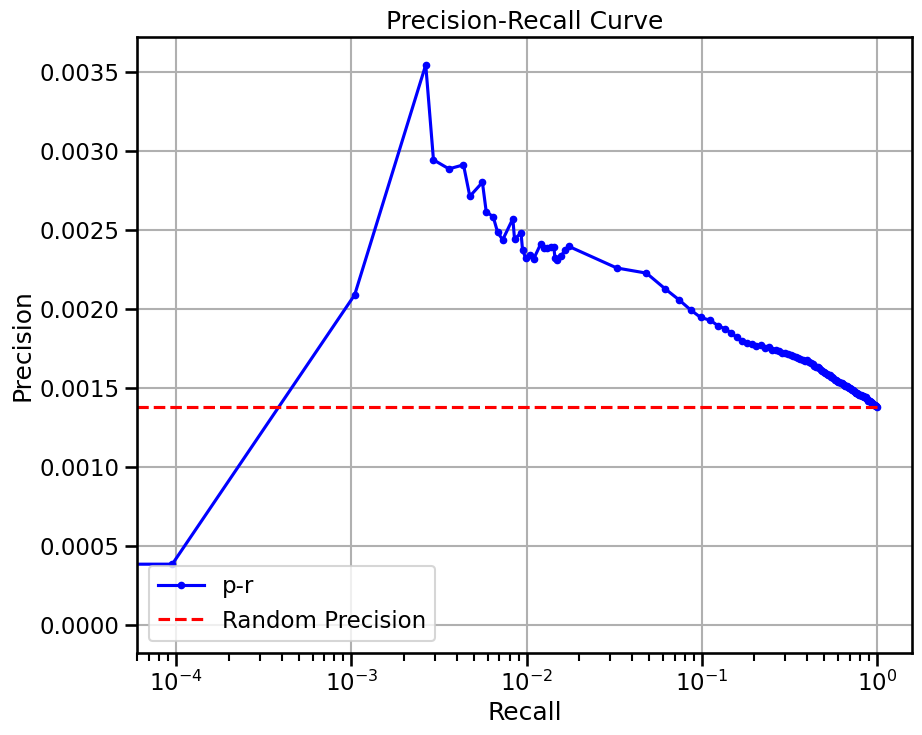

scprint_benchmark2
base enrichment


Top central genes: []


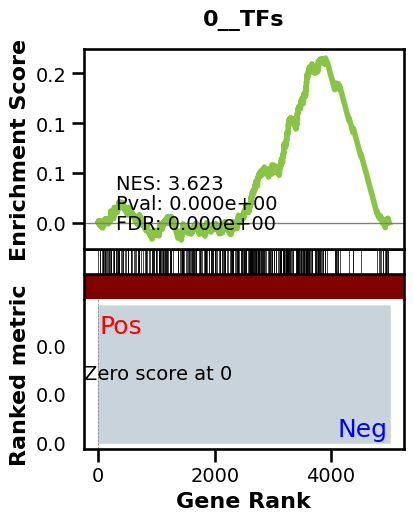

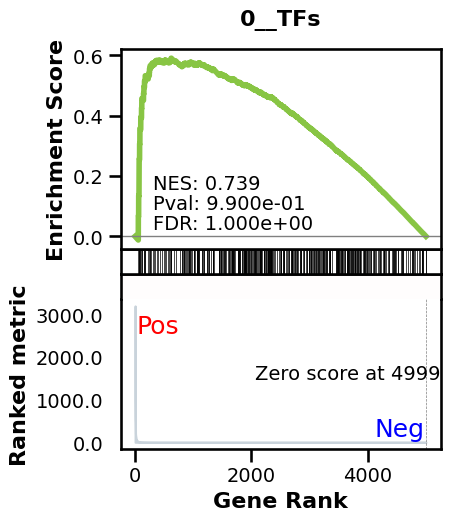

_________________________________________
TF specific enrichment


found some significant results for  8.333333333333334 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2763 genes
intersection pct: 0.5526
precision:  0.0013802419097612326 
recall:  1.0 
random precision: 0.0013807416352897488



  0%|          | 0/128 [00:00<?, ?it/s]


  8%|▊         | 10/128 [00:00<00:01, 90.57it/s]


 16%|█▌        | 20/128 [00:00<00:01, 89.84it/s]


 23%|██▎       | 29/128 [00:00<00:01, 89.77it/s]


 30%|███       | 39/128 [00:00<00:00, 90.14it/s]


 38%|███▊      | 49/128 [00:00<00:00, 90.16it/s]


 46%|████▌     | 59/128 [00:00<00:00, 90.31it/s]


 54%|█████▍    | 69/128 [00:00<00:00, 90.31it/s]


 62%|██████▏   | 79/128 [00:00<00:00, 90.48it/s]


 70%|██████▉   | 89/128 [00:00<00:00, 90.42it/s]


 77%|███████▋  | 99/128 [00:01<00:00, 90.49it/s]


 85%|████████▌ | 109/128 [00:01<00:00, 90.40it/s]


 93%|█████████▎| 119/128 [00:01<00:00, 90.49it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 90.29it/s]

Area Under Precision-Recall Curve (AUPRC):  0.00129683992452862
EPR: 1.0310960505592124


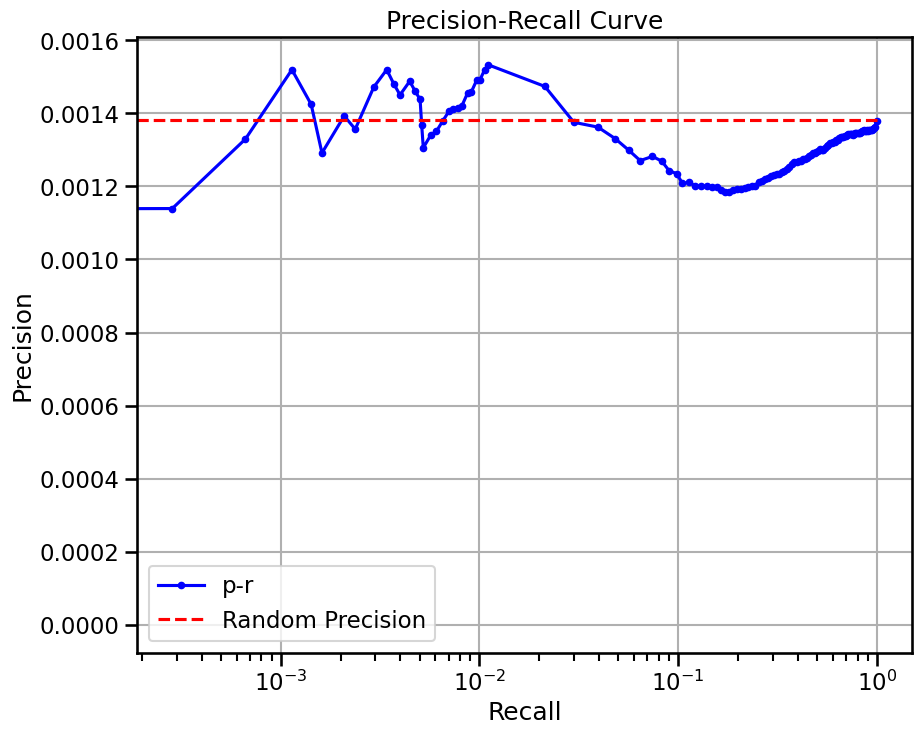


  0%|          | 0/12 [00:00<?, ?it/s]


  8%|▊         | 1/12 [00:02<00:29,  2.70s/it]


 17%|█▋        | 2/12 [00:04<00:19,  1.91s/it]


 25%|██▌       | 3/12 [00:05<00:15,  1.67s/it]


 33%|███▎      | 4/12 [00:06<00:12,  1.58s/it]


 42%|████▏     | 5/12 [00:08<00:10,  1.50s/it]


 50%|█████     | 6/12 [00:09<00:08,  1.44s/it]


 58%|█████▊    | 7/12 [00:10<00:06,  1.40s/it]


 67%|██████▋   | 8/12 [00:12<00:05,  1.37s/it]


 75%|███████▌  | 9/12 [00:13<00:04,  1.35s/it]


 83%|████████▎ | 10/12 [00:14<00:02,  1.33s/it]


 92%|█████████▏| 11/12 [00:16<00:01,  1.33s/it]


100%|██████████| 12/12 [00:16<00:00,  1.12s/it]


100%|██████████| 12/12 [00:17<00:00,  1.42s/it]

base enrichment


Top central genes: []


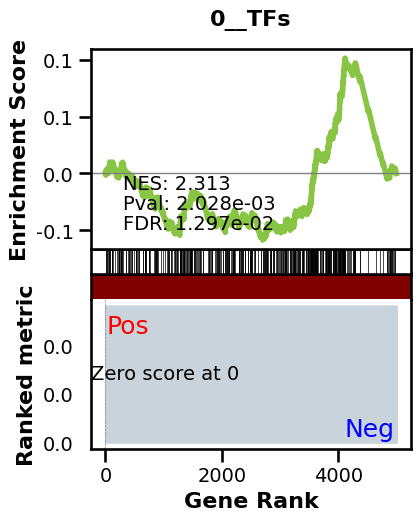

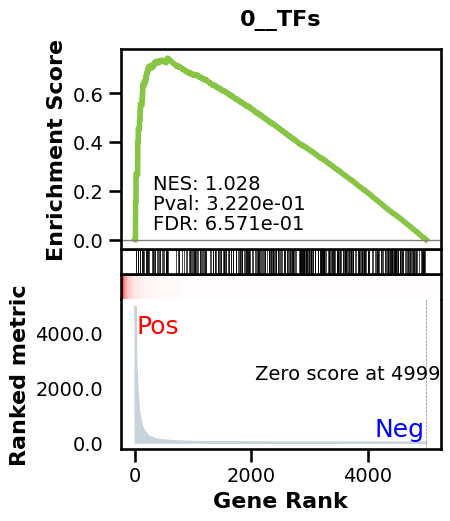

_________________________________________
TF specific enrichment


found some significant results for  11.11111111111111 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3169 genes
intersection pct: 0.6338
precision:  0.00138142053605649 
recall:  1.0 
random precision: 0.001381856590518629



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▌         | 7/128 [00:00<00:01, 68.28it/s]


 11%|█         | 14/128 [00:00<00:01, 68.12it/s]


 16%|█▋        | 21/128 [00:00<00:01, 68.15it/s]


 22%|██▏       | 28/128 [00:00<00:01, 68.16it/s]


 27%|██▋       | 35/128 [00:00<00:01, 68.13it/s]


 33%|███▎      | 42/128 [00:00<00:01, 68.15it/s]


 38%|███▊      | 49/128 [00:00<00:01, 68.14it/s]


 44%|████▍     | 56/128 [00:00<00:01, 68.12it/s]


 49%|████▉     | 63/128 [00:00<00:00, 68.09it/s]


 55%|█████▍    | 70/128 [00:01<00:00, 68.15it/s]


 60%|██████    | 77/128 [00:01<00:00, 68.12it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 68.04it/s]


 71%|███████   | 91/128 [00:01<00:00, 68.12it/s]


 77%|███████▋  | 98/128 [00:01<00:00, 68.16it/s]


 82%|████████▏ | 105/128 [00:01<00:00, 68.14it/s]


 88%|████████▊ | 112/128 [00:01<00:00, 68.14it/s]


 93%|█████████▎| 119/128 [00:01<00:00, 68.12it/s]


 98%|█████████▊| 126/128 [00:01<00:00, 68.13it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 68.07it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0016669420267624898
EPR: 1.4100086141840178


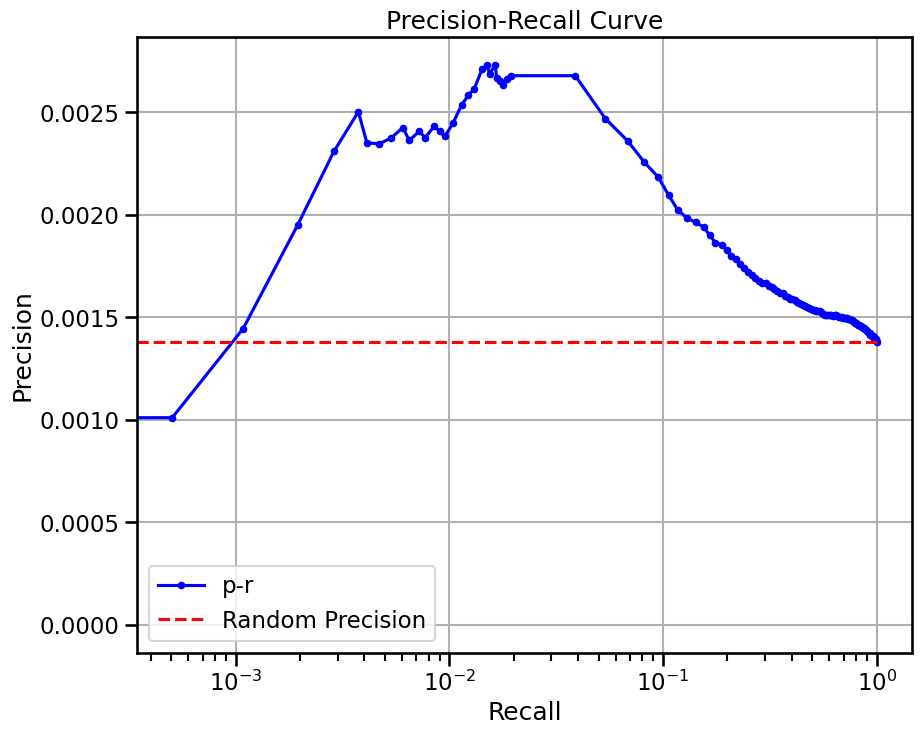

scprint_benchmark2
base enrichment


Top central genes: []


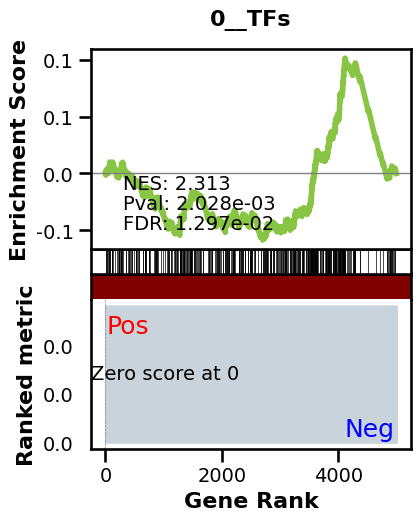

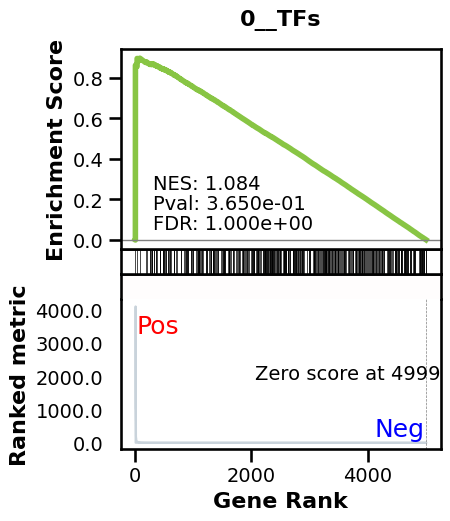

_________________________________________
TF specific enrichment


found some significant results for  9.25925925925926 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3169 genes
intersection pct: 0.6338
precision:  0.00138142053605649 
recall:  1.0 
random precision: 0.001381856590518629



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▌         | 7/128 [00:00<00:01, 68.01it/s]


 11%|█         | 14/128 [00:00<00:01, 67.98it/s]


 16%|█▋        | 21/128 [00:00<00:01, 68.01it/s]


 22%|██▏       | 28/128 [00:00<00:01, 68.02it/s]


 27%|██▋       | 35/128 [00:00<00:01, 68.04it/s]


 33%|███▎      | 42/128 [00:00<00:01, 68.06it/s]


 38%|███▊      | 49/128 [00:00<00:01, 68.09it/s]


 44%|████▍     | 56/128 [00:00<00:01, 68.06it/s]


 49%|████▉     | 63/128 [00:00<00:00, 68.02it/s]


 55%|█████▍    | 70/128 [00:01<00:00, 67.99it/s]


 60%|██████    | 77/128 [00:01<00:00, 67.98it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 67.94it/s]


 71%|███████   | 91/128 [00:01<00:00, 67.94it/s]


 77%|███████▋  | 98/128 [00:01<00:00, 67.92it/s]


 82%|████████▏ | 105/128 [00:01<00:00, 67.96it/s]


 88%|████████▊ | 112/128 [00:01<00:00, 67.96it/s]


 93%|█████████▎| 119/128 [00:01<00:00, 67.99it/s]


 98%|█████████▊| 126/128 [00:01<00:00, 67.98it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 67.93it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001438121166549243
EPR: 2.989634965619781


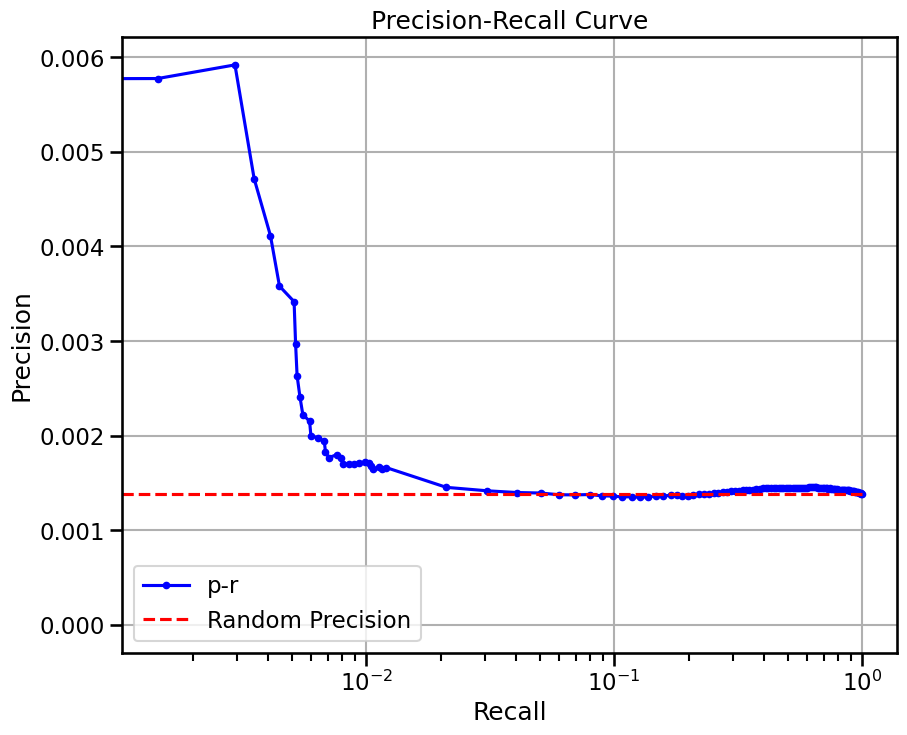


  0%|          | 0/64 [00:00<?, ?it/s]


  2%|▏         | 1/64 [00:02<03:05,  2.94s/it]


  3%|▎         | 2/64 [00:04<02:06,  2.04s/it]


  5%|▍         | 3/64 [00:05<01:46,  1.74s/it]


  6%|▋         | 4/64 [00:07<01:35,  1.59s/it]


  8%|▊         | 5/64 [00:08<01:28,  1.50s/it]


  9%|▉         | 6/64 [00:09<01:23,  1.44s/it]


 11%|█         | 7/64 [00:11<01:19,  1.40s/it]


 12%|█▎        | 8/64 [00:12<01:16,  1.37s/it]


 14%|█▍        | 9/64 [00:13<01:14,  1.35s/it]


 16%|█▌        | 10/64 [00:15<01:12,  1.34s/it]


 17%|█▋        | 11/64 [00:16<01:10,  1.33s/it]


 19%|█▉        | 12/64 [00:17<01:08,  1.33s/it]


 20%|██        | 13/64 [00:18<01:07,  1.32s/it]


 22%|██▏       | 14/64 [00:20<01:05,  1.32s/it]


 23%|██▎       | 15/64 [00:21<01:04,  1.31s/it]


 25%|██▌       | 16/64 [00:22<01:02,  1.31s/it]


 27%|██▋       | 17/64 [00:24<01:01,  1.31s/it]


 28%|██▊       | 18/64 [00:25<01:00,  1.32s/it]


 30%|██▉       | 19/64 [00:26<00:59,  1.31s/it]


 31%|███▏      | 20/64 [00:28<00:57,  1.31s/it]


 33%|███▎      | 21/64 [00:29<00:56,  1.31s/it]


 34%|███▍      | 22/64 [00:30<00:55,  1.31s/it]


 36%|███▌      | 23/64 [00:32<00:53,  1.31s/it]


 38%|███▊      | 24/64 [00:33<00:52,  1.31s/it]


 39%|███▉      | 25/64 [00:34<00:51,  1.31s/it]


 41%|████      | 26/64 [00:36<00:49,  1.31s/it]


 42%|████▏     | 27/64 [00:37<00:48,  1.31s/it]


 44%|████▍     | 28/64 [00:38<00:47,  1.31s/it]


 45%|████▌     | 29/64 [00:39<00:45,  1.31s/it]


 47%|████▋     | 30/64 [00:41<00:44,  1.31s/it]


 48%|████▊     | 31/64 [00:42<00:43,  1.31s/it]


 50%|█████     | 32/64 [00:43<00:41,  1.31s/it]


 52%|█████▏    | 33/64 [00:45<00:40,  1.31s/it]


 53%|█████▎    | 34/64 [00:46<00:39,  1.31s/it]


 55%|█████▍    | 35/64 [00:47<00:38,  1.31s/it]


 56%|█████▋    | 36/64 [00:49<00:36,  1.31s/it]


 58%|█████▊    | 37/64 [00:50<00:35,  1.31s/it]


 59%|█████▉    | 38/64 [00:51<00:34,  1.31s/it]


 61%|██████    | 39/64 [00:53<00:32,  1.31s/it]


 62%|██████▎   | 40/64 [00:54<00:31,  1.31s/it]


 64%|██████▍   | 41/64 [00:55<00:30,  1.31s/it]


 66%|██████▌   | 42/64 [00:56<00:28,  1.31s/it]


 67%|██████▋   | 43/64 [00:58<00:27,  1.31s/it]


 69%|██████▉   | 44/64 [00:59<00:26,  1.31s/it]


 70%|███████   | 45/64 [01:00<00:24,  1.32s/it]


 72%|███████▏  | 46/64 [01:02<00:23,  1.32s/it]


 73%|███████▎  | 47/64 [01:03<00:22,  1.32s/it]


 75%|███████▌  | 48/64 [01:04<00:21,  1.31s/it]


 77%|███████▋  | 49/64 [01:06<00:19,  1.31s/it]


 78%|███████▊  | 50/64 [01:07<00:18,  1.32s/it]


 80%|███████▉  | 51/64 [01:08<00:17,  1.32s/it]


 81%|████████▏ | 52/64 [01:10<00:15,  1.32s/it]


 83%|████████▎ | 53/64 [01:11<00:14,  1.33s/it]


 84%|████████▍ | 54/64 [01:12<00:13,  1.33s/it]


 86%|████████▌ | 55/64 [01:14<00:11,  1.32s/it]


 88%|████████▊ | 56/64 [01:15<00:10,  1.32s/it]


 89%|████████▉ | 57/64 [01:16<00:09,  1.32s/it]


 91%|█████████ | 58/64 [01:18<00:07,  1.32s/it]


 92%|█████████▏| 59/64 [01:19<00:06,  1.32s/it]


 94%|█████████▍| 60/64 [01:20<00:05,  1.32s/it]


 95%|█████████▌| 61/64 [01:22<00:03,  1.32s/it]


 97%|█████████▋| 62/64 [01:23<00:02,  1.32s/it]


 98%|█████████▊| 63/64 [01:24<00:01,  1.32s/it]


100%|██████████| 64/64 [01:26<00:00,  1.32s/it]


100%|██████████| 64/64 [01:26<00:00,  1.35s/it]

base enrichment


Top central genes: []


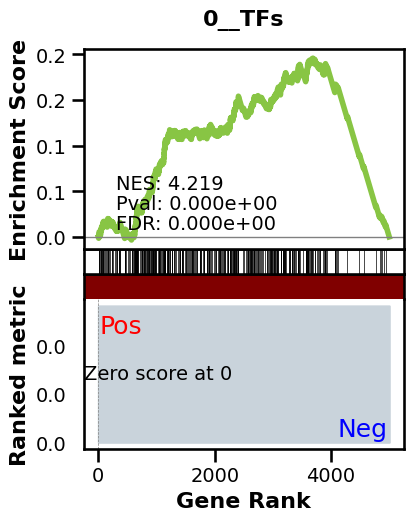

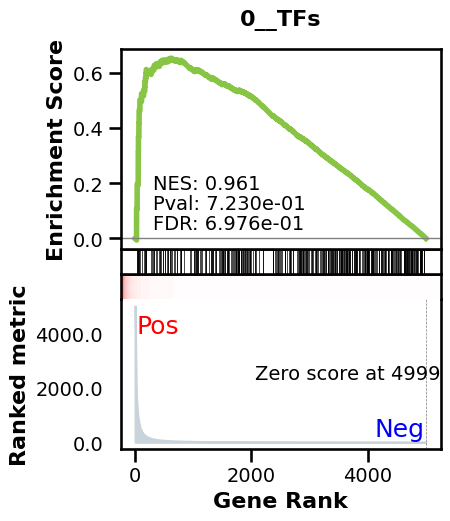

_________________________________________
TF specific enrichment


found some significant results for  45.45454545454545 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2705 genes
intersection pct: 0.541
precision:  0.0012886384835366833 
recall:  1.0 
random precision: 0.0012891150510231984



  0%|          | 0/128 [00:00<?, ?it/s]


  8%|▊         | 10/128 [00:00<00:01, 94.68it/s]


 16%|█▌        | 20/128 [00:00<00:01, 94.65it/s]


 23%|██▎       | 30/128 [00:00<00:01, 94.37it/s]


 31%|███▏      | 40/128 [00:00<00:00, 94.46it/s]


 39%|███▉      | 50/128 [00:00<00:00, 94.52it/s]


 47%|████▋     | 60/128 [00:00<00:00, 94.15it/s]


 55%|█████▍    | 70/128 [00:00<00:00, 94.22it/s]


 62%|██████▎   | 80/128 [00:00<00:00, 94.29it/s]


 70%|███████   | 90/128 [00:00<00:00, 94.44it/s]


 78%|███████▊  | 100/128 [00:01<00:00, 94.21it/s]


 86%|████████▌ | 110/128 [00:01<00:00, 94.37it/s]


 94%|█████████▍| 120/128 [00:01<00:00, 94.45it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 94.18it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0014057041875996134
EPR: 0.5752611651841995


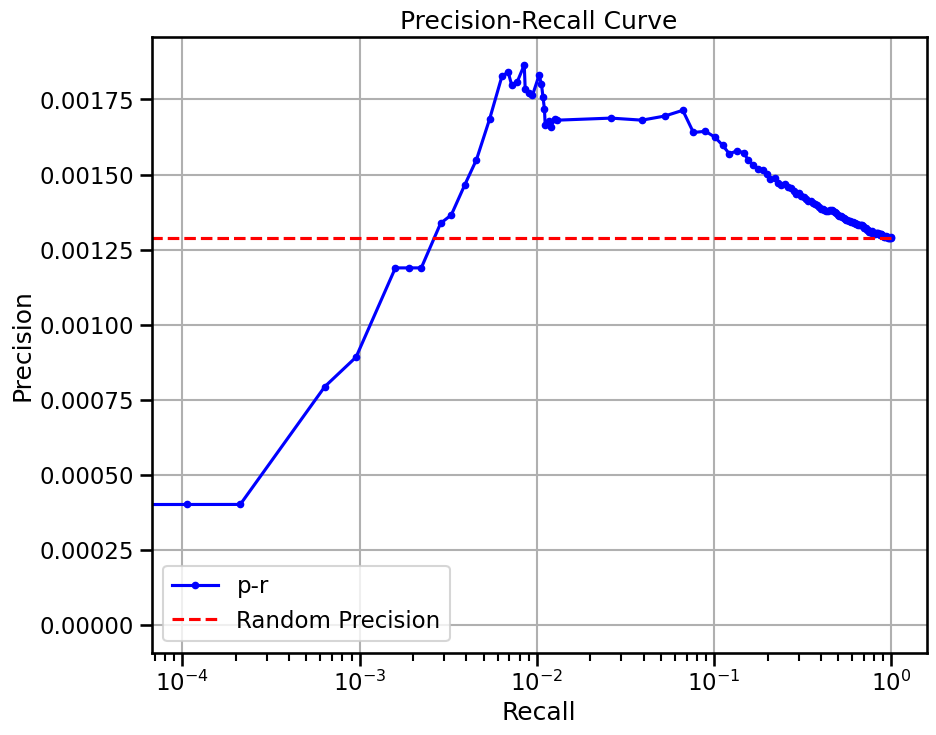

scprint_benchmark2
base enrichment


Top central genes: []


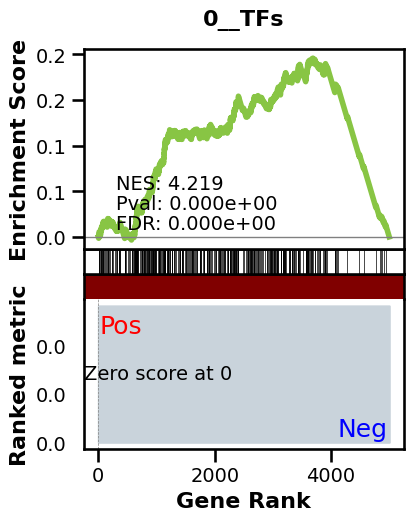

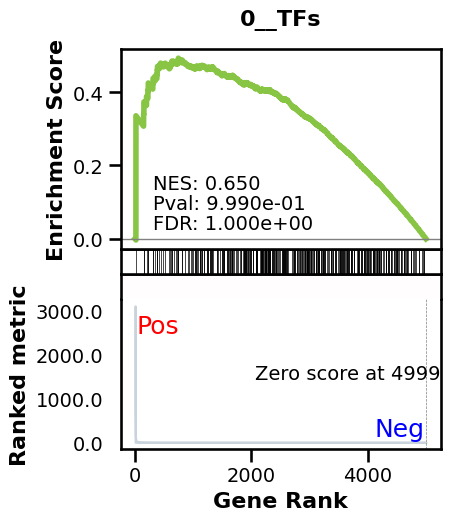

_________________________________________
TF specific enrichment


found some significant results for  9.090909090909092 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2705 genes
intersection pct: 0.541
precision:  0.0012886384835366833 
recall:  1.0 
random precision: 0.0012891150510231984



  0%|          | 0/128 [00:00<?, ?it/s]


  8%|▊         | 10/128 [00:00<00:01, 95.70it/s]


 16%|█▌        | 20/128 [00:00<00:01, 94.49it/s]


 23%|██▎       | 30/128 [00:00<00:01, 95.01it/s]


 31%|███▏      | 40/128 [00:00<00:00, 95.25it/s]


 39%|███▉      | 50/128 [00:00<00:00, 95.39it/s]


 47%|████▋     | 60/128 [00:00<00:00, 94.94it/s]


 55%|█████▍    | 70/128 [00:00<00:00, 95.12it/s]


 62%|██████▎   | 80/128 [00:00<00:00, 95.25it/s]


 70%|███████   | 90/128 [00:00<00:00, 95.41it/s]


 78%|███████▊  | 100/128 [00:01<00:00, 95.46it/s]


 86%|████████▌ | 110/128 [00:01<00:00, 95.17it/s]


 94%|█████████▍| 120/128 [00:01<00:00, 95.25it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 95.19it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0011157991579702766
EPR: 0.49297628192893606


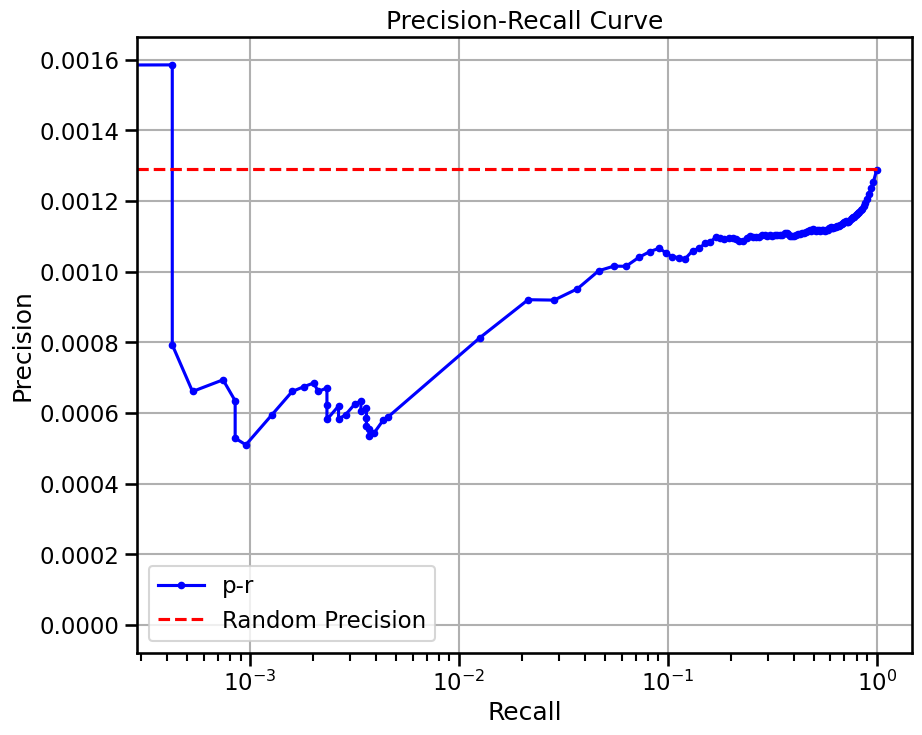

In [7]:
metrics = {}
clf_omni = None
for celltype in CELLTYPES:
    grn_inferer = GRNfer(model, adata[adata.X.sum(1) > 500],
                        how="random expr",
                        preprocess="softmax",
                        head_agg='mean',
                        filtration="none",
                        forward_mode="none",
                        organisms=['NCBITaxon:9606',NCBITaxon:10090'],
                        num_genes=2200,
                        max_cells=MAXCELLS,
                        doplot=False,
                        batch_size=32,
                        )
    grn = grn_inferer(layer=list(range(model.nlayers))[:], ell_type=celltype)
    grn.var.index = make_index_unique(grn.var['symbol'].astype(str))
    metrics[celltype+'_scprint_full'] = BenGRN(grn).scprint_benchmark()
    del grn
    grn_inferer = GRNfer(model, adata[adata.X.sum(1) > 500],
                        how="most var across",
                        preprocess="softmax",
                        head_agg='none',
                        filtration="none",
                        forward_mode="none",
                        num_genes=NUM_GENES,
                        max_cells=1024,
                        doplot=False,
                        batch_size=16,
                        )
    grn = grn_inferer(layer=list(range(model.nlayers))[:], cell_type=celltype)
    grn.var.index = make_index_unique(grn.var['symbol'].astype(str))
    grn.varp['all'] = grn.varp['GRN']
    grn.varp['GRN'] = grn.varp['GRN'][:,:,:].mean(-1)
    metrics[celltype+'_scprint_mean'] = BenGRN(grn).scprint_benchmark()
    grn.varp['GRN'][~grn.var.isTF,:]=0
    metrics[celltype+'_scprint_tf_mean'] = BenGRN(grn).scprint_benchmark()
    if clf_omni == None:
        grn.varp['GRN'] = grn.varp['all']
        print("train classifier")
        _, m, clf_omni = train_classifier(grn, C=1, train_size=0.6, class_weight={
                                        1: 200, 0: 1}, shuffle=True, max_iter=200, return_full=False)
        joblib.dump(clf_omni, 'clf_omni.pkl')
    grn.varp['GRN'] = grn.varp['all'][:,:,clf_omni.coef_[0] > 0].mean(-1)
    print("scprint_benchmark2")
    metrics[celltype+'_scprint_class'] = BenGRN(grn).scprint_benchmark()
    grn.varp['GRN'][~grn.var.isTF,:]=0
    metrics[celltype+'_scprint_tf_class'] = BenGRN(grn).scprint_benchmark()
    del grn

In [8]:
metrics

{'kidney distal convoluted tubule epithelial cell_scprint_mean': {'TF_enr': True,
  'enriched_terms_Regulators': ['celltype.gmt__Beta cells',
   'celltype.gmt__Distal tubule cells',
   'celltype.gmt__Loop of Henle cells'],
  'significant_enriched_TFtargets': 14.705882352941176,
  'precision': 0.0008261483363013599,
  'recall': 1.0,
  'rand_precision': 0.0008263855307705822,
  'auprc': 0.0008765866577707097,
  'epr': 2.7836056684301527},
 'kidney distal convoluted tubule epithelial cell_scprint_class': {'TF_enr': True,
  'significant_enriched_TFtargets': 2.9411764705882355,
  'precision': 0.0008261483363013599,
  'recall': 1.0,
  'rand_precision': 0.0008263855307705822,
  'auprc': 0.0009938231033779985,
  'epr': 4.979989927628857},
 'kidney loop of Henle thick ascending limb epithelial cell_scprint_mean': {'TF_enr': True,
  'enriched_terms_Regulators': ['celltype.gmt__Loop of Henle cells',
   'celltype.gmt__Proximal tubule cells',
   'celltype.gmt__Pulmonary alveolar type II cells',
   

In [9]:
import pandas as pd

In [10]:
res = []
for k, v in metrics.items():
    res.append([k.split('_')[-1], k.split('_')[0], v['epr'], v['auprc'], v['rand_precision'], v['significant_enriched_TFtargets'], v.get('TF_enr', False), 'tf_' in k])

df = pd.DataFrame(res, columns=['tools','name','EPR', 'AUPRC', 'RAND', 'TF_targ', 'TF_enr', 'TF_only'])
df

,tools,name,EPR,AUPRC,RAND,TF_targ,TF_enr,TF_only
0,mean,kidney distal convoluted tubule epithelial cell,2.783606,0.000877,0.000826,14.705882,True,False
1,class,kidney distal convoluted tubule epithelial cell,4.979990,0.000994,0.000826,2.941176,True,False
2,mean,kidney loop of Henle thick ascending limb epit...,2.462295,0.000889,0.000834,7.692308,True,False
3,class,kidney loop of Henle thick ascending limb epit...,5.319020,0.000959,0.000834,7.692308,True,False
4,mean,kidney collecting duct principal cell,1.020019,0.001372,0.001259,12.500000,True,False
5,class,kidney collecting duct principal cell,1.737159,0.001887,0.001259,4.687500,True,False
6,mean,mesangial cell,1.043804,0.001264,0.001044,25.000000,True,False
7,class,mesangial cell,2.208943,0.001143,0.001044,25.000000,True,False
8,mean,blood vessel smooth muscle cell,1.455607,0.001694,0.001573,10.909091,True,False
9,class,blood vessel smooth muscle cell,2.008982,0.002031,0.001573,10.909091,True,False
